# ABC Insurance Customer Data Analysis and Predictive Modeling

## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Part 1: Data Quality and Customer Understanding 

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### 1.1 The exploratory data analysis of the data

In [1]:
#load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

#### Load of the datasets and basic statistics

#### 1) CUSTOMERS DATASET

In [ ]:
#load the customer dataset
file_path = os.path.join("data","ABC_df_customer.csv")
df_customer = pd.read_csv(file_path)
df_customer.head()

/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_9362/2167222107.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer = pd.read_csv(file_path)


,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411
1,1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414
2,2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442
3,3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463
4,4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366


In [ ]:
df_customer.tail()

,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
2303119,2303119,2.213003e+11,5.213001e+11,2014-02-15,1967-07-07,882-XX-4608,NaN,1361.290041,623.368014,426
2303120,2303120,2.213031e+11,5.213013e+11,2022-02-16,1965-05-26,709-XX-1726,NaN,1563.921158,997.482828,507
2303121,2303121,2.213013e+11,5.213005e+11,2019-08-16,1967-07-07,317-XX-1336,NaN,1128.048444,393.819352,300
2303122,2303122,2.213021e+11,5.213008e+11,2005-09-11,1948-10-31,110-XX-9215,NaN,1380.204016,556.785305,424
2303123,2303123,2.213025e+11,5.213009e+11,2008-09-10,1981-04-22,102-XX-6555,NaN,1348.650555,294.226518,408


In [ ]:
df_customer.shape


(2303124, 10)

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303124 entries, 0 to 2303123
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   INDIVIDUAL_ID           float64
 2   ADDRESS_ID              float64
 3   CUST_ORIG_DATE          object 
 4   DATE_OF_BIRTH           object 
 5   SOCIAL_SECURITY_NUMBER  object 
 6   CUST_START_DATE         object 
 7   CURR_ANN_AMT_CAR        float64
 8   CURR_ANN_AMT_HEALTH     float64
 9   CURR_ANN_AMT_HOUSE      int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 175.7+ MB


In [ ]:
#get a clearer understanding of the data
df_customer.describe(include='all')

,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
count,2.303124e+06,2.303123e+06,2.303123e+06,2303124,2303124,2303124,2211911,2.303124e+06,2.303124e+06,2.303124e+06
unique,NaN,NaN,NaN,5253,3492,1986833,18275,NaN,NaN,NaN
top,NaN,NaN,NaN,2005-09-11,1967-07-07,217-XX-6487,2005-09-11,NaN,NaN,NaN
freq,NaN,NaN,NaN,599153,404695,6,535157,NaN,NaN,NaN
mean,1.151562e+06,2.213018e+11,5.213007e+11,NaN,NaN,NaN,NaN,1.431069e+03,5.725299e+02,4.293221e+02
std,6.648548e+05,9.915268e+05,4.170653e+05,NaN,NaN,NaN,NaN,2.439311e+02,1.896686e+02,7.606463e+01
min,0.000000e+00,2.213000e+11,5.213000e+11,NaN,NaN,NaN,NaN,2.869633e+02,-3.516244e+02,9.000000e+01
25%,5.757808e+05,2.213009e+11,5.213003e+11,NaN,NaN,NaN,NaN,1.264830e+03,4.442061e+02,3.770000e+02
50%,1.151562e+06,2.213018e+11,5.213007e+11,NaN,NaN,NaN,NaN,1.425758e+03,5.720247e+02,4.270000e+02
75%,1.727342e+06,2.213027e+11,5.213010e+11,NaN,NaN,NaN,NaN,1.591793e+03,7.001292e+02,4.790000e+02


#### 1) DEMOGRAPHICS DATASET

In [ ]:
#load the transaction dataset
file_path = os.path.join("data","ABC_df_demographic.csv")
df_demographic= pd.read_csv(file_path)
df_demographic.head()

,Unnamed: 0,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,0,2.213028e+11,187500.000,1.0,8.0,Single,300000 - 349999,1,1,1,Y
1,1,2.213032e+11,63750.000,0.0,0.0,Single,NaN,0,0,0,N
2,2,2.213032e+11,41250.000,0.0,15.0,Married,75000 - 99999,1,0,1,N
3,3,2.213032e+11,120558.264,0.0,0.0,NaN,1000 - 24999,1,0,0,N
4,4,2.213032e+11,187500.000,0.0,0.0,NaN,NaN,0,0,1,Y


In [ ]:
df_demographic.tail()


,Unnamed: 0,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
2112574,2112574,2.213006e+11,131250.0,1.0,12.0,Married,50000 - 74999,1,0,1,N
2112575,2112575,2.213006e+11,56250.0,1.0,5.0,Single,50000 - 74999,0,0,1,N
2112576,2112576,2.213006e+11,187500.0,0.0,13.0,Married,225000 - 249999,1,1,1,N
2112577,2112577,2.213006e+11,187500.0,2.0,12.0,Married,100000 - 124999,1,0,1,Y
2112578,2112578,2.213006e+11,63750.0,1.0,4.0,Single,100000 - 124999,1,0,0,N


In [ ]:
df_demographic.shape


(2112579, 11)

In [ ]:
df_demographic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112579 entries, 0 to 2112578
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   INDIVIDUAL_ID        float64
 2   INCOME               float64
 3   HAS_CHILDREN         float64
 4   LENGTH_OF_RESIDENCE  float64
 5   MARITAL_STATUS       object 
 6   HOME_MARKET_VALUE    object 
 7   HOME_OWNER           int64  
 8   COLLEGE_DEGREE       int64  
 9   GOOD_CREDIT          int64  
 10  ADVANCED_STUDIES     object 
dtypes: float64(4), int64(4), object(3)
memory usage: 177.3+ MB


In [ ]:
df_demographic.describe(include='all')


,Unnamed: 0,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
count,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,2.112579e+06,1680931,1922374,2.112579e+06,2.112579e+06,2.112579e+06,2112579
unique,NaN,NaN,NaN,NaN,NaN,2,19,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,Married,75000 - 99999,NaN,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,1048472,365838,NaN,NaN,NaN,1563128
mean,1.056289e+06,2.213018e+11,1.205583e+05,4.684885e-01,6.800571e+00,NaN,NaN,6.983649e-01,3.016152e-01,8.195779e-01,NaN
std,6.098492e+05,9.916207e+05,7.504165e+04,5.853729e-01,5.090825e+00,NaN,NaN,4.589678e-01,4.589592e-01,3.845388e-01,NaN
min,0.000000e+00,2.213000e+11,7.500000e+03,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.281445e+05,2.213009e+11,7.125000e+04,0.000000e+00,2.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN
50%,1.056289e+06,2.213018e+11,1.205583e+05,0.000000e+00,6.801000e+00,NaN,NaN,1.000000e+00,0.000000e+00,1.000000e+00,NaN
75%,1.584434e+06,2.213027e+11,1.312500e+05,1.000000e+00,1.100000e+01,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,NaN


#### 1) TERMINATION DATASET

In [ ]:
#load the transaction dataset
file_path = os.path.join("data","ABC_df_termination.csv")
df_termination= pd.read_csv(file_path)
df_termination.head()

,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
0,0,2.213026e+11,2022-10-09
1,1,2.213028e+11,2022-04-24
2,2,2.213027e+11,2022-05-21
3,3,2.213002e+11,2022-04-27
4,4,2.213026e+11,2022-09-16


In [ ]:
df_termination.tail()

,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
269254,269254,2.213022e+11,2022-01-09
269255,269255,2.213007e+11,2022-02-27
269256,269256,2.213030e+11,2022-03-21
269257,269257,2.213025e+11,2022-02-26
269258,269258,2.213024e+11,2022-09-23


In [ ]:
df_termination.shape

(269259, 3)

In [ ]:
df_termination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269259 entries, 0 to 269258
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     269259 non-null  int64  
 1   INDIVIDUAL_ID  269259 non-null  float64
 2   SUSPD_DATE     266566 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [ ]:
df_termination.describe(include='all')

,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
count,269259.000000,2.692590e+05,266566
unique,NaN,NaN,2086
top,NaN,NaN,2022-03-17
freq,NaN,NaN,938
mean,134629.000000,2.213018e+11,NaN
std,77728.522403,9.890987e+05,NaN
min,0.000000,2.213000e+11,NaN
25%,67314.500000,2.213009e+11,NaN
50%,134629.000000,2.213018e+11,NaN
75%,201943.500000,2.213027e+11,NaN


#### Dataset Preparation for Merging

Before we can merge our datasets for comprehensive analysis and modeling, we need to ensure that the datasets are properly formatted and that any unnecessary columns are removed.

Removing Unnecessary Columns:

In the loading process, an extra column named 'Unnamed: 0' was generated, which is not necessary for our analysis. This could be an artifact from an index column in the CSV file that doesn't provide any meaningful information. We'll proceed to remove this column from all datasets to clean up our data.

Converting ID Columns to Integer Type:

The ID columns, which will be used as keys for merging, must be of a uniform type across all datasets. Currently, these ID columns are not in integer format, which could lead to issues during the merge. We will convert these ID columns (INDIVIDUAL_ID, ADDRESS_ID) to integers for several reasons:
- **Semantic Correctness**: Integer representation aligns with the discrete and non-fractional nature of identifiers, ensuring clarity and data integrity.
- **Enhanced Compatibility**: Integer IDs ensure better interoperability with databases and external applications, reducing integration issues.

In [ ]:
#Let's remove the columns that are not required for the analysis
df_customer.drop('Unnamed: 0', axis=1, inplace=True)

df_demographic.drop( 'Unnamed: 0', axis=1, inplace=True)

df_termination.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Check if the INDIVIDUAL_ID and ADDRESS_ID columns have any decimal part by comparing them with their integer conversion
individual_id_decimal_check = (df_customer['INDIVIDUAL_ID'] % 1).sum()
address_id_decimal_check = (df_customer['ADDRESS_ID'] % 1).sum()

individual_id_decimal_check, address_id_decimal_check

(0.0, 0.0)

In [ ]:
#Drop the rows with missing values in the columns INDIVIDUAL_ID and ADDRESS_ID
df_customer = df_customer.dropna(subset=['INDIVIDUAL_ID', 'ADDRESS_ID'])

#Convert the INDIVIDUAL_ID and ADDRESS_ID columns to integer
df_customer['INDIVIDUAL_ID'] = df_customer['INDIVIDUAL_ID'].astype(int)
df_customer['ADDRESS_ID'] = df_customer['ADDRESS_ID'].astype(int)

In [ ]:

individual_id_decimal_check = (df_demographic['INDIVIDUAL_ID'] % 1).sum()
individual_id_decimal_check

0.0

In [ ]:
df_demographic = df_demographic.dropna(subset=['INDIVIDUAL_ID'])

#Convert the INDIVIDUAL_ID column to integer
df_demographic['INDIVIDUAL_ID'] = df_demographic['INDIVIDUAL_ID'].astype(int)


In [ ]:
individual_id_decimal_check = (df_termination['INDIVIDUAL_ID'] % 1).sum()
individual_id_decimal_check

0.0

In [ ]:
df_termination = df_termination.dropna(subset=['INDIVIDUAL_ID'])
#Convert the INDIVIDUAL_ID column to integer
df_termination['INDIVIDUAL_ID'] = df_termination['INDIVIDUAL_ID'].astype(int)

In [ ]:
#merge the customer demographic and termination dataframes on the INDIVIDUAL_ID column
df = pd.merge(df_customer, df_demographic, on='INDIVIDUAL_ID', how='inner')
#df = pd.merge(df, df_termination, on='INDIVIDUAL_ID', how='outer')
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,221300017872,521300005982,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,2.0,15.0,Married,50000 - 74999,1,1,1,N
1,221300134410,521300051115,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,0.0,2.0,Single,50000 - 74999,1,0,0,N
2,221300673028,521300247929,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,0.0,10.0,Married,75000 - 99999,1,0,0,N
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,2.0,6.0,Married,175000 - 199999,1,0,1,N
4,221301622347,521300588399,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,1.0,4.0,Married,225000 - 249999,1,1,1,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133685 entries, 0 to 2133684
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   INDIVIDUAL_ID           int64  
 1   ADDRESS_ID              int64  
 2   CUST_ORIG_DATE          object 
 3   DATE_OF_BIRTH           object 
 4   SOCIAL_SECURITY_NUMBER  object 
 5   CUST_START_DATE         object 
 6   CURR_ANN_AMT_CAR        float64
 7   CURR_ANN_AMT_HEALTH     float64
 8   CURR_ANN_AMT_HOUSE      int64  
 9   INCOME                  float64
 10  HAS_CHILDREN            float64
 11  LENGTH_OF_RESIDENCE     float64
 12  MARITAL_STATUS          object 
 13  HOME_MARKET_VALUE       object 
 14  HOME_OWNER              int64  
 15  COLLEGE_DEGREE          int64  
 16  GOOD_CREDIT             int64  
 17  ADVANCED_STUDIES        object 
dtypes: float64(5), int64(6), object(7)
memory usage: 309.3+ MB


#### Data Quality Assessment Plan

We will now embark on a thorough data quality assessment based on the data quality framework. Our goal is to ensure that our dataset adheres to the following dimensions of data quality:

- **Completeness**: We will check for and address any missing values in our columns.
- **Consistency**: We will verify that all data is in the correct format and that the dataset conforms to logical constraints.
- **Correctness**: We will validate the accuracy of the data and correct any erroneous values.
- **Uniqueness**: We will ensure that each customer is represented uniquely without any duplicates.
- **Timeliness**: We will examine date columns to ensure the data is current and relevant for our analysis.
- **Stability**: We will assess whether the dataset includes any volatile data that could change frequently and affect analysis.
- **Relevance**: We will evaluate whether all included features are necessary for the analysis or if some may be redundant.
- **Contextualization**: We will make sure that the data is well-understood in terms of its collection context and meaning.
- **Trustworthiness**: We will discuss the source and collection process of the data to ensure its reliability.

#### Initial Observations from `info()`
- The `CUST_START_DATE`, `MARITAL_STATUS`, `HOME_MARKET_VALUE`, and `SUSPD_DATE` columns contain missing values that will need to be addressed.
- The date columns (`CUST_ORIG_DATE`, `DATE_OF_BIRTH`, `CUST_START_DATE`, `SUSPD_DATE`) are of `object` type and likely need to be converted to `datetime` for proper analysis.
- The `SOCIAL_SECURITY_NUMBER` should be examined to ensure it meets the correct format and privacy standards.
- The `HOME_MARKET_VALUE` is listed as an object type, which suggests it may contain non-numeric values or special characters that will require cleaning.

#### Next Steps
We will proceed with the data quality assessment by examining each column in detail, identifying data quality issues, and applying corrective measures. This will involve:
- Converting date columns to the appropriate `datetime` format.
- Handling missing values strategically, deciding on imputation or removal.
- Normalizing numerical columns like `HOME_MARKET_VALUE` to ensure they are in the correct format for analysis.
- Verifying the uniqueness of the `INDIVIDUAL_ID` to avoid duplicate records.

In [ ]:
df.isnull().sum()


INDIVIDUAL_ID                  0
ADDRESS_ID                     0
CUST_ORIG_DATE                 0
DATE_OF_BIRTH                  0
SOCIAL_SECURITY_NUMBER         0
CUST_START_DATE            84472
CURR_ANN_AMT_CAR               0
CURR_ANN_AMT_HEALTH            0
CURR_ANN_AMT_HOUSE             0
INCOME                         0
HAS_CHILDREN                   0
LENGTH_OF_RESIDENCE            0
MARITAL_STATUS            435895
HOME_MARKET_VALUE         192147
HOME_OWNER                     0
COLLEGE_DEGREE                 0
GOOD_CREDIT                    0
ADVANCED_STUDIES               0
dtype: int64

In [ ]:
df[['CUST_START_DATE','MARITAL_STATUS','HOME_MARKET_VALUE']].describe()


,CUST_START_DATE,MARITAL_STATUS,HOME_MARKET_VALUE
count,2049213,1697790,1941538
unique,18084,2,19
top,2005-09-11,Married,75000 - 99999
freq,496029,1058961,369562


In [ ]:
#percentage of missing values in the CUST_START_DATE column
df['CUST_START_DATE'].isnull().mean()

0.03958972388145392

In [ ]:
#percentage of missing values in the MARITAL_STATUS column
df['MARITAL_STATUS'].isnull().mean()

0.20429210497332081

In [ ]:
#percentage of missing values in the MARITAL_STATUS column
df['MARITAL_STATUS'].isnull().mean()

0.20429210497332081

In our merged dataset, we have identified missing values in several columns, which are critical to address for maintaining data quality. Specifically, we have observed missing values in the `CUST_START_DATE` column. Additionally, there are significant gaps in the `MARITAL_STATUS` and `HOME_MARKET_VALUE` columns.

Strategy:

- **Remove records with missing `CUST_START_DATE`**: The absence of a policy start date would impede any analysis that depends on the policy's age or duration.

The `MARITAL_STATUS` and `HOME_MARKET_VALUE` fields have missing values that may not be as straightforward to handle. These variables are potentially significant for demographic segmentation and risk assessment. Therefore, we will take a closer analytical approach to understand the nature of these gaps:

- **Analyzing `MARITAL_STATUS` missing values**: We will investigate patterns in the data that might explain why these values are missing. If there is a pattern that is explainable, we may impute the missing values using a statistical method.

- **Investigating `HOME_MARKET_VALUE` missing values**: Given that this is a financial metric, we need to consider if the absence of this value correlates with other customer characteristics. Depending on the distribution and relationship with other variables, we might impute these missing values using the median home market value or a model-based imputation method.

In [ ]:
df = df.dropna(subset=['CUST_START_DATE'])
df.isnull().sum()

INDIVIDUAL_ID                  0
ADDRESS_ID                     0
CUST_ORIG_DATE                 0
DATE_OF_BIRTH                  0
SOCIAL_SECURITY_NUMBER         0
CUST_START_DATE                0
CURR_ANN_AMT_CAR               0
CURR_ANN_AMT_HEALTH            0
CURR_ANN_AMT_HOUSE             0
INCOME                         0
HAS_CHILDREN                   0
LENGTH_OF_RESIDENCE            0
MARITAL_STATUS            418829
HOME_MARKET_VALUE         184472
HOME_OWNER                     0
COLLEGE_DEGREE                 0
GOOD_CREDIT                    0
ADVANCED_STUDIES               0
dtype: int64

In [ ]:
df['MARITAL_STATUS'].value_counts(dropna=False)

Married    1016927
Single      613457
NaN         418829
Name: MARITAL_STATUS, dtype: int64

In [ ]:
df['MARITAL_STATUS'].unique()


array(['Married', 'Single', nan], dtype=object)

<Axes: >

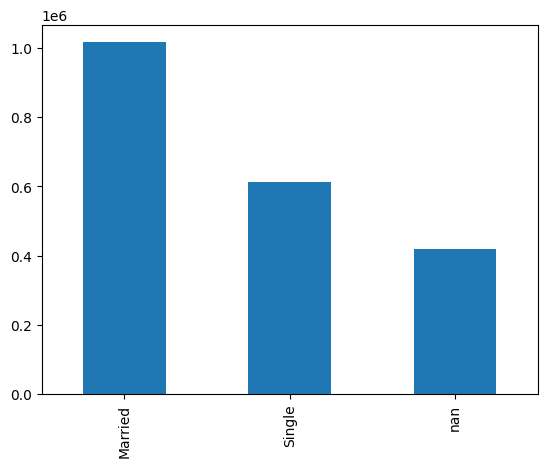

In [ ]:
df['MARITAL_STATUS'].value_counts(dropna=False).plot(kind='bar')

In [ ]:
df.corrwith(df['MARITAL_STATUS'].isnull())

/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_9362/3067839141.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['MARITAL_STATUS'].isnull())


INDIVIDUAL_ID          0.003958
ADDRESS_ID             0.003605
CURR_ANN_AMT_CAR      -0.075115
CURR_ANN_AMT_HEALTH   -0.038149
CURR_ANN_AMT_HOUSE    -0.072495
INCOME                -0.044278
HAS_CHILDREN          -0.322825
LENGTH_OF_RESIDENCE   -0.271842
HOME_OWNER            -0.523379
COLLEGE_DEGREE        -0.214478
GOOD_CREDIT           -0.110804
dtype: float64

In [ ]:
# Before applying one-hot encoding, handle NaN values
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].fillna('Unknown')

# Apply one-hot encoding to the MARITAL_STATUS column
marital_status_dummies = pd.get_dummies(df['MARITAL_STATUS'], prefix='MARITAL_STATUS')

# concatenate the new columns (one-hot encoded)
df = pd.concat([df, marital_status_dummies], axis=1)

# drop the original 'MARITAL_STATUS'
df = df.drop('MARITAL_STATUS', axis=1)

The `MARITAL_STATUS` feature presents an interesting dimension in our dataset, accounting for the diversity in our customers' life stages. Initially, we faced the challenge of handling its missing values and integrating this categorical variable into our predictive models. To ensure we fully capture the nuances it may introduce, we've decided to retain `MARITAL_STATUS` during the exploratory phase of our analysis.

To effectively incorporate this feature into our machine learning models, we have applied one-hot encoding, which transforms `MARITAL_STATUS` into multiple binary columns, each representing a potential category. This technique allows us to:

- Represent 'Married' as a separate feature column where the presence of this marital status is indicated by `1`, and its absence by `0`.
- Similarly, 'Single' is denoted by `1` in its respective feature column when applicable.
- Address missing values by treating 'Unknown' as its own category, thereby preserving data integrity without imputing arbitrary values.

By employing one-hot encoding, we leverage the categorical nature of `MARITAL_STATUS` without assuming ordinality, and we ensure that our models can interpret this feature without bias towards any particular order or magnitude. This approach allows each category to contribute individually to the predictive power of our models, paving the way for insights into how marital status might correlate with customer value.


In [ ]:
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown
0,221300017872,521300005982,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,2.0,15.0,50000 - 74999,1,1,1,N,1,0,0
1,221300134410,521300051115,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,0.0,2.0,50000 - 74999,1,0,0,N,0,1,0
2,221300673028,521300247929,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,0.0,10.0,75000 - 99999,1,0,0,N,1,0,0
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,2.0,6.0,175000 - 199999,1,0,1,N,1,0,0
4,221301622347,521300588399,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,1.0,4.0,225000 - 249999,1,1,1,Y,1,0,0


In [ ]:
df['HOME_MARKET_VALUE'].value_counts(dropna=False)

75000 - 99999      354951
100000 - 124999    320300
50000 - 74999      259463
125000 - 149999    243269
NaN                184472
150000 - 174999    170959
175000 - 199999    113191
25000 - 49999      107464
200000 - 224999     78557
225000 - 249999     53686
250000 - 274999     36322
1000 - 24999        34541
300000 - 349999     24528
275000 - 299999     21949
350000 - 399999     13646
500000 - 749999     11943
400000 - 449999      7868
450000 - 499999      5822
750000 - 999999      3799
1000000 Plus         2483
Name: HOME_MARKET_VALUE, dtype: int64

<Axes: >

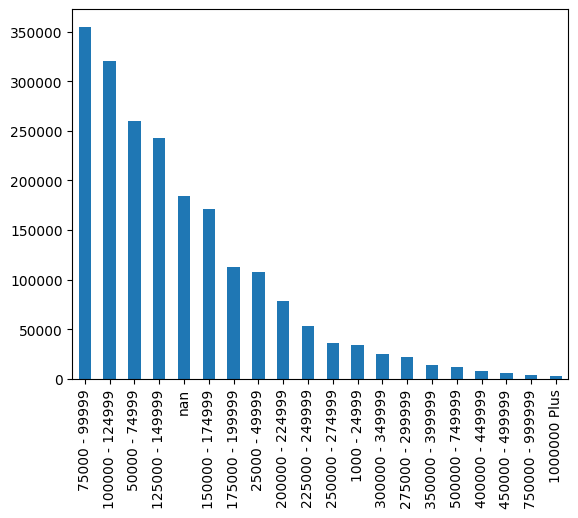

In [ ]:
df['HOME_MARKET_VALUE'].unique()
df['HOME_MARKET_VALUE'].value_counts(dropna=False).plot(kind='bar')

In [ ]:
#feature engineering of the HOME_MARKET_VALUE column

def convert_home_market_value_to_midpoint(value):
    if pd.isnull(value):
        return np.nan  
    elif value == '1000000 Plus':
        return 1000000  
    else:
        # Split the string on the dash and take the average of the low and high end
        low, high = value.split('-')
        return (int(low) + int(high)) / 2

# Apply the function to the HOME_MARKET_VALUE column
df['HOME_MARKET_VALUE_NUMERIC'] = df['HOME_MARKET_VALUE'].apply(convert_home_market_value_to_midpoint)


In [ ]:
df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,...,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown,HOME_MARKET_VALUE_NUMERIC
0,221300017872,521300005982,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,...,15.0,50000 - 74999,1,1,1,N,1,0,0,62499.5
1,221300134410,521300051115,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,...,2.0,50000 - 74999,1,0,0,N,0,1,0,62499.5
2,221300673028,521300247929,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,...,10.0,75000 - 99999,1,0,0,N,1,0,0,87499.5
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,...,6.0,175000 - 199999,1,0,1,N,1,0,0,187499.5
4,221301622347,521300588399,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,...,4.0,225000 - 249999,1,1,1,Y,1,0,0,237499.5


In [ ]:
df.corrwith(df['HOME_MARKET_VALUE_NUMERIC'].isnull())


/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_9362/1483481887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['HOME_MARKET_VALUE_NUMERIC'].isnull())


INDIVIDUAL_ID                0.011772
ADDRESS_ID                   0.012056
CURR_ANN_AMT_CAR            -0.079484
CURR_ANN_AMT_HEALTH         -0.040591
CURR_ANN_AMT_HOUSE          -0.076766
INCOME                      -0.039296
HAS_CHILDREN                -0.086397
LENGTH_OF_RESIDENCE         -0.396976
HOME_OWNER                  -0.454982
COLLEGE_DEGREE              -0.084614
GOOD_CREDIT                 -0.062917
MARITAL_STATUS_Married      -0.141396
MARITAL_STATUS_Single       -0.058888
MARITAL_STATUS_Unknown       0.242195
HOME_MARKET_VALUE_NUMERIC         NaN
dtype: float64

<Axes: >

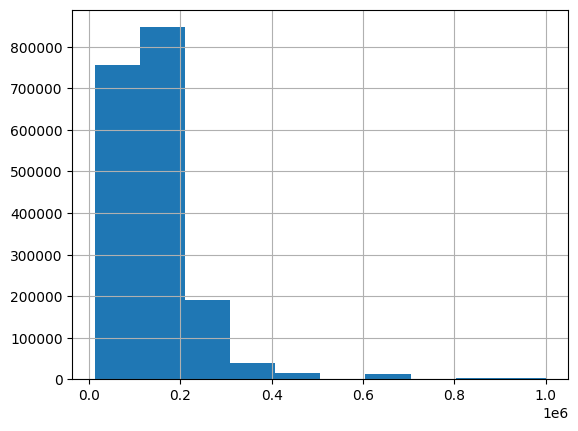

In [ ]:
df['HOME_MARKET_VALUE_NUMERIC'].hist(bins=10)


In [ ]:
df['HOME_MARKET_VALUE_NUMERIC'].isnull().mean()


0.09002090070675914

In [ ]:
#remove null rows from the HOME_MARKET_VALUE_NUMERIC column
df = df.dropna(subset=['HOME_MARKET_VALUE_NUMERIC'])
df.isnull().mean()

INDIVIDUAL_ID                0.0
ADDRESS_ID                   0.0
CUST_ORIG_DATE               0.0
DATE_OF_BIRTH                0.0
SOCIAL_SECURITY_NUMBER       0.0
CUST_START_DATE              0.0
CURR_ANN_AMT_CAR             0.0
CURR_ANN_AMT_HEALTH          0.0
CURR_ANN_AMT_HOUSE           0.0
INCOME                       0.0
HAS_CHILDREN                 0.0
LENGTH_OF_RESIDENCE          0.0
HOME_MARKET_VALUE            0.0
HOME_OWNER                   0.0
COLLEGE_DEGREE               0.0
GOOD_CREDIT                  0.0
ADVANCED_STUDIES             0.0
MARITAL_STATUS_Married       0.0
MARITAL_STATUS_Single        0.0
MARITAL_STATUS_Unknown       0.0
HOME_MARKET_VALUE_NUMERIC    0.0
dtype: float64

Upon thorough examination of the `HOME_MARKET_VALUE_NUMERIC` variable, we have determined that the missing values do not exhibit significant correlations with other features in our dataset. This suggests that the impact of these missing values on our overall analysis may be minimal. Considering that the missing data accounts for approximately 10% of our dataset and in light of its low correlation with other variables, we have decided that the most prudent course of action is to remove these records from our dataset.

Justification for Data Removal:
- **Dataset Size**: Our dataset is sufficiently large, and the exclusion of these records will not compromise the statistical power of our subsequent analyses.
- **Bias Consideration**: Preliminary analysis suggests that the missingness is likely random (MCAR), reducing the risk of introducing bias through their removal.
- **Model Simplicity**: By removing the missing data, we maintain the simplicity of our modeling process, avoiding the uncertainties and potential biases associated with imputation.
- **Pattern of Missingness**: The lack of a strong relationship between the missing values and other features supports the assumption that the missingness is not systematic and is unlikely to be informative.

#### Correction of features format - CONSISTENCY & CORRECTNESS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864741 entries, 0 to 2133684
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   INDIVIDUAL_ID              int64  
 1   ADDRESS_ID                 int64  
 2   CUST_ORIG_DATE             object 
 3   DATE_OF_BIRTH              object 
 4   SOCIAL_SECURITY_NUMBER     object 
 5   CUST_START_DATE            object 
 6   CURR_ANN_AMT_CAR           float64
 7   CURR_ANN_AMT_HEALTH        float64
 8   CURR_ANN_AMT_HOUSE         int64  
 9   INCOME                     float64
 10  HAS_CHILDREN               float64
 11  LENGTH_OF_RESIDENCE        float64
 12  HOME_MARKET_VALUE          object 
 13  HOME_OWNER                 int64  
 14  COLLEGE_DEGREE             int64  
 15  GOOD_CREDIT                int64  
 16  ADVANCED_STUDIES           object 
 17  MARITAL_STATUS_Married     uint8  
 18  MARITAL_STATUS_Single      uint8  
 19  MARITAL_STATUS_Unknown     uint8  
 20  HO

In [ ]:
# Convert date columns to datetime
date_columns = ['CUST_ORIG_DATE', 'DATE_OF_BIRTH', 'CUST_START_DATE']
for date_column in date_columns:
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')


In [ ]:
df['SOCIAL_SECURITY_NUMBER'] = df['SOCIAL_SECURITY_NUMBER'].astype(str)

In [ ]:
df['HAS_CHILDREN'].value_counts(dropna=False)


0.0    1029078
1.0     783607
2.0      41844
3.0       6991
4.0       1940
5.0        668
6.0        613
Name: HAS_CHILDREN, dtype: int64

In [ ]:
df['LENGTH_OF_RESIDENCE'].value_counts(dropna=False)

15.000    341017
6.801     199029
2.000     154995
3.000     142551
1.000     140596
4.000     126420
5.000     114428
6.000      95150
7.000      85704
8.000      75752
9.000      67906
0.000      61911
10.000     61548
11.000     59770
12.000     52357
13.000     45216
14.000     40391
Name: LENGTH_OF_RESIDENCE, dtype: int64

In [ ]:
df['HOME_OWNER'].value_counts(dropna=False)

1    1424654
0     440087
Name: HOME_OWNER, dtype: int64

In [ ]:
df['COLLEGE_DEGREE'].value_counts(dropna=False)

0    1279669
1     585072
Name: COLLEGE_DEGREE, dtype: int64

In [ ]:
df['GOOD_CREDIT'].value_counts(dropna=False)

1    1542481
0     322260
Name: GOOD_CREDIT, dtype: int64

In [ ]:
df['ADVANCED_STUDIES'].value_counts(dropna=False)

N    1376013
Y     488728
Name: ADVANCED_STUDIES, dtype: int64

In [ ]:
#trnsform the categorical columns to binary
df['ADVANCED_STUDIES_BINARY'] = df['ADVANCED_STUDIES'].map({'Y': 1, 'N': 0})
df['ADVANCED_STUDIES_BINARY'].value_counts()

0    1376013
1     488728
Name: ADVANCED_STUDIES_BINARY, dtype: int64

In [ ]:
df.dtypes

INDIVIDUAL_ID                         int64
ADDRESS_ID                            int64
CUST_ORIG_DATE               datetime64[ns]
DATE_OF_BIRTH                datetime64[ns]
SOCIAL_SECURITY_NUMBER               object
CUST_START_DATE              datetime64[ns]
CURR_ANN_AMT_CAR                    float64
CURR_ANN_AMT_HEALTH                 float64
CURR_ANN_AMT_HOUSE                    int64
INCOME                              float64
HAS_CHILDREN                        float64
LENGTH_OF_RESIDENCE                 float64
HOME_MARKET_VALUE                    object
HOME_OWNER                            int64
COLLEGE_DEGREE                        int64
GOOD_CREDIT                           int64
ADVANCED_STUDIES                     object
MARITAL_STATUS_Married                uint8
MARITAL_STATUS_Single                 uint8
MARITAL_STATUS_Unknown                uint8
HOME_MARKET_VALUE_NUMERIC           float64
ADVANCED_STUDIES_BINARY               int64
dtype: object

#### Analysis of Duplicates - UNIQUENESS

In [ ]:
df.duplicated().sum()

0

#### EDA OF THE FEATURES

#### Analysis of Temporal features - TIMELINESS


In [ ]:
print(df['CUST_ORIG_DATE'].describe(datetime_is_numeric=True))
print(df['DATE_OF_BIRTH'].describe(datetime_is_numeric=True))
print(df['CUST_START_DATE'].describe(datetime_is_numeric=True))

count                          1864741
mean     2013-04-11 06:34:51.575826688
min                2005-09-11 00:00:00
25%                2005-09-11 00:00:00
50%                2013-03-11 00:00:00
75%                2019-05-04 00:00:00
max                2022-11-12 00:00:00
Name: CUST_ORIG_DATE, dtype: object
count                          1864741
mean     1967-04-06 12:47:19.943134224
min                1908-12-11 00:00:00
25%                1959-12-30 00:00:00
50%                1967-07-07 00:00:00
75%                1976-09-24 00:00:00
max                1999-06-19 00:00:00
Name: DATE_OF_BIRTH, dtype: object
count                          1864741
mean     2013-03-29 10:23:51.222888448
min                1985-09-16 00:00:00
25%                2005-09-11 00:00:00
50%                2013-02-28 00:00:00
75%                2019-07-02 00:00:00
max                2041-10-28 00:00:00
Name: CUST_START_DATE, dtype: object


Observations:
- The `CUST_ORIG_DATE` indicates that customers have been joining from late 2005 through late 2022, with a median joining date around the end of 2020.
- The `DATE_OF_BIRTH` data indicates that the range of customer ages spans from young adults (about 23 years old at the time of the latest data point in 2022) to much older individuals (possibly over 100 years old), with a median age around 55 years old.
- The `CUST_START_DATE` appears to have an anomaly, as the maximum date is in the future (2041), which is not possible and suggests either a data entry error or placeholder data.

In [ ]:
# Check for future dates in the CUST_START_DATE column
future_dates = df[df['CUST_START_DATE'] > datetime.now()]
print(f"Number of future dates in CUST_START_DATE: {future_dates.shape[0]}")

Number of future dates in CUST_START_DATE: 28288


In [ ]:
invalid_dates = df[df['CUST_START_DATE'] < df['CUST_ORIG_DATE']]
print(f"Number of records where CUST_START_DATE is before CUST_ORIG_DATE: {invalid_dates.shape[0]}")

Number of records where CUST_START_DATE is before CUST_ORIG_DATE: 67163


In [ ]:
#see the percentage of the sum of future_dates and invalid_dates respect to the total number of records
print(f"Percentage of future dates in CUST_START_DATE: {future_dates.shape[0] / df.shape[0] * 100:.2f}%")
print(f"Percentage of records where CUST_START_DATE is before CUST_ORIG_DATE: {invalid_dates.shape[0] / df.shape[0] * 100:.2f}%")

(future_dates.shape[0] + invalid_dates.shape[0]) / df.shape[0]

Percentage of future dates in CUST_START_DATE: 1.52%
Percentage of records where CUST_START_DATE is before CUST_ORIG_DATE: 3.60%


0.05118726943849038

During our data quality assessment, we identified two critical issues within the `CUST_START_DATE` column:

1. **Future Dates**: Our analysis revealed that 28366 records have `CUST_START_DATE` values set in the future, beyond the current date. Since it's not possible to start a policy in the future, these entries are clear indications of data entry errors.

2. **Pre-Original Joining Dates**: We also discovered 67,163 instances (approximately 3.60% of the dataset) where the `CUST_START_DATE` precedes the `CUST_ORIG_DATE`. This is logically inconsistent since a customer cannot start a policy before officially joining.

Given the relatively small percentage of the affected records, we have decided to remove these records from our dataset for the following reasons:
- **Data Accuracy**: Including these records would compromise the accuracy of our analysis, particularly in any time series or cohort-based assessments.
- **Feasibility of Correction**: Without a reliable external data source or knowledge of the correct dates, we cannot accurately correct these values.
- **Proportion and Impact**: The affected records represent a small portion of the overall dataset, and their removal is unlikely to significantly impact the statistical power or generalizability of our findings.
- **Prevention of Bias**: Imputing these values without a clear rationale or method could introduce bias into our dataset, affecting subsequent analyses and modeling.

In [ ]:
# Remove records with a CUST_START_DATE in the future
df = df[df['CUST_START_DATE'] <= datetime.now()]

# Remove records where CUST_START_DATE is before CUST_ORIG_DATE
df = df[df['CUST_START_DATE'] >= df['CUST_ORIG_DATE']]

In [ ]:
df.shape

(1769290, 22)

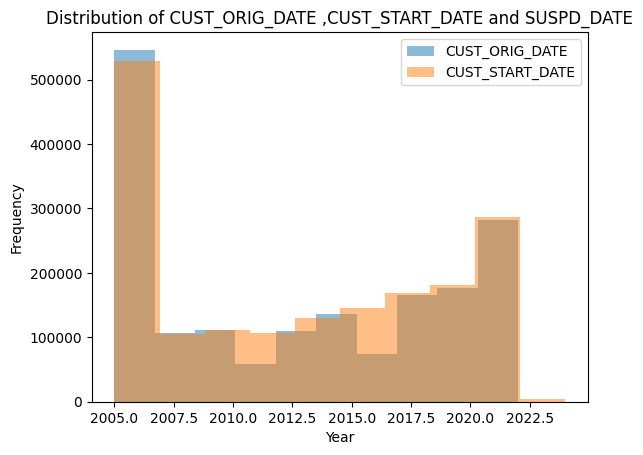

In [ ]:
# Distribution of CUST_ORIG_DATE
df['CUST_ORIG_DATE'].dt.year.plot(kind='hist', alpha=0.5, label='CUST_ORIG_DATE')

# Distribution of CUST_START_DATE
df['CUST_START_DATE'].dt.year.plot(kind='hist', alpha=0.5, label='CUST_START_DATE')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of CUST_ORIG_DATE ,CUST_START_DATE and SUSPD_DATE')
plt.legend()
plt.show()

In [ ]:
#see most common value of cust_start_date and cust_orig_date
df['CUST_START_DATE'].dt.year.value_counts().head()

2005    479746
2022    243017
2019     98803
2018     86259
2020     82138
Name: CUST_START_DATE, dtype: int64

In [ ]:
df['CUST_ORIG_DATE'].dt.year.value_counts().head()

2005    496490
2022    240751
2019     97162
2018     84814
2017     80736
Name: CUST_ORIG_DATE, dtype: int64

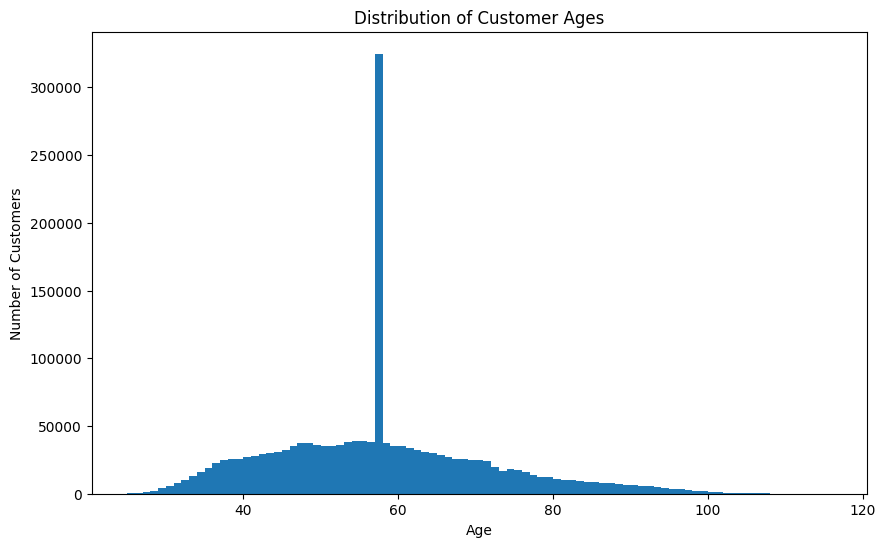

In [ ]:
current_year = datetime.now().year
df['AGE'] = current_year - df['DATE_OF_BIRTH'].dt.year

# Plot the distribution of ages
plt.figure(figsize=(10, 6))
df['AGE'].hist(bins=range(min(df['AGE']), max(df['AGE'])+1))
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(False)
plt.show()

In [ ]:
common_ages = df['AGE'].value_counts()

print("Most Common Ages and their Counts:")
print(common_ages)

Most Common Ages and their Counts:
57     324849
55      39264
54      39142
56      38455
53      38437
        ...  
112        63
113        43
115        21
114        12
116         1
Name: AGE, Length: 92, dtype: int64


In [ ]:
df['AGE'].describe()

count    1.769290e+06
mean     5.730704e+01
std      1.393653e+01
min      2.500000e+01
25%      4.800000e+01
50%      5.700000e+01
75%      6.500000e+01
max      1.160000e+02
Name: AGE, dtype: float64

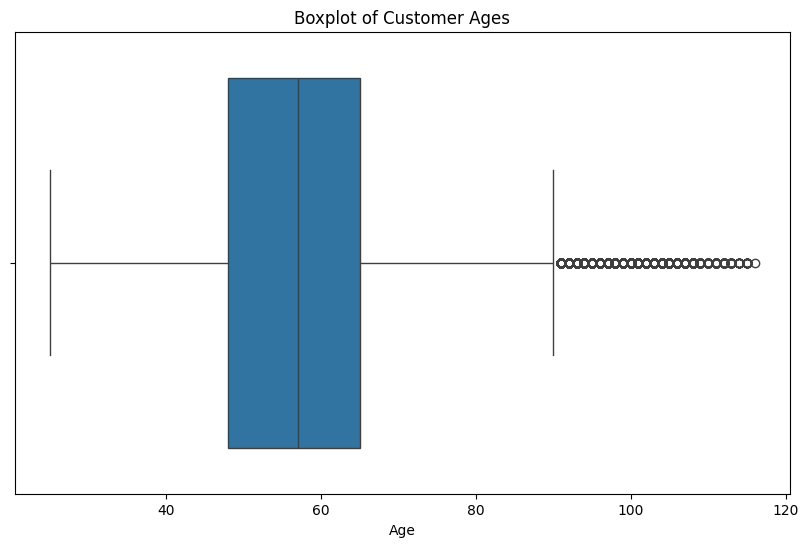

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AGE'])
plt.title('Boxplot of Customer Ages')
plt.xlabel('Age')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for what is considered an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]
outliers['AGE'].value_counts()

91     5887
92     5440
93     5119
94     4465
95     3808
96     3480
97     2826
98     2305
99     1739
100    1403
101    1074
102     867
103     706
104     543
105     408
106     308
107     225
108     130
111      99
109      81
110      70
112      63
113      43
115      21
114      12
116       1
Name: AGE, dtype: int64

In [ ]:
#drop rows with age over 100 becuase they are outliers 
df = df[df['AGE'] <= 100]

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'age' with all other columns
age_correlation = correlation_matrix['AGE'].sort_values(ascending=False)

age_correlation

/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_9362/883917198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


AGE                          1.000000
LENGTH_OF_RESIDENCE          0.282431
MARITAL_STATUS_Married       0.133392
HOME_OWNER                   0.108291
CURR_ANN_AMT_CAR             0.086084
CURR_ANN_AMT_HOUSE           0.082865
COLLEGE_DEGREE               0.069922
CURR_ANN_AMT_HEALTH          0.043980
ADDRESS_ID                   0.041548
INDIVIDUAL_ID                0.037445
GOOD_CREDIT                  0.017197
INCOME                      -0.005964
HOME_MARKET_VALUE_NUMERIC   -0.016249
ADVANCED_STUDIES_BINARY     -0.026220
MARITAL_STATUS_Unknown      -0.078783
MARITAL_STATUS_Single       -0.079770
HAS_CHILDREN                -0.145739
Name: AGE, dtype: float64

Age Demographics Correlation Analysis

Our dataset's correlation analysis reveals several key insights about the relationship between customers' age and their attributes and behaviors:
- `HAS_CHILDREN` (r = -0.1457): There is a negative correlation with having children, indicating that younger customers are more likely to have children.
- `LENGTH_OF_RESIDENCE` (r = 0.2824): Age shows the strongest positive correlation with the length of residence. Older customers are likely to have lived in their current residence longer, which may be due to stability and less need to move.
- `MARITAL_STATUS_Married` (r = 0.1334): A moderate positive correlation with marital status suggests older customers are more likely to be married.

#### Analysis of Numerical Features

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764639 entries, 0 to 2133684
Data columns (total 23 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   INDIVIDUAL_ID              int64         
 1   ADDRESS_ID                 int64         
 2   CUST_ORIG_DATE             datetime64[ns]
 3   DATE_OF_BIRTH              datetime64[ns]
 4   SOCIAL_SECURITY_NUMBER     object        
 5   CUST_START_DATE            datetime64[ns]
 6   CURR_ANN_AMT_CAR           float64       
 7   CURR_ANN_AMT_HEALTH        float64       
 8   CURR_ANN_AMT_HOUSE         int64         
 9   INCOME                     float64       
 10  HAS_CHILDREN               float64       
 11  LENGTH_OF_RESIDENCE        float64       
 12  HOME_MARKET_VALUE          object        
 13  HOME_OWNER                 int64         
 14  COLLEGE_DEGREE             int64         
 15  GOOD_CREDIT                int64         
 16  ADVANCED_STUDIES           object   

In [ ]:
df.describe().round(2) 

,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown,HOME_MARKET_VALUE_NUMERIC,ADVANCED_STUDIES_BINARY,AGE
count,1.764639e+06,1.764639e+06,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00,1764639.00
mean,2.213018e+11,5.213007e+11,1437.13,574.96,431.15,121555.15,0.48,7.44,0.76,0.31,0.83,0.52,0.31,0.17,132985.61,0.26,57.18
std,9.915679e+05,4.169209e+05,245.04,189.90,76.40,75607.10,0.59,4.87,0.42,0.46,0.38,0.50,0.46,0.38,93306.74,0.44,13.75
min,2.213000e+11,5.213000e+11,286.96,-351.62,90.00,7500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12999.50,0.00,25.00
25%,2.213009e+11,5.213003e+11,1270.19,446.55,379.00,71250.00,0.00,3.00,1.00,0.00,1.00,0.00,0.00,0.00,87499.50,0.00,48.00
50%,2.213018e+11,5.213007e+11,1432.01,574.48,429.00,120558.26,0.00,6.80,1.00,0.00,1.00,1.00,0.00,0.00,112499.50,0.00,57.00
75%,2.213027e+11,5.213010e+11,1598.86,702.78,481.00,131250.00,1.00,12.00,1.00,1.00,1.00,1.00,1.00,0.00,162499.50,1.00,64.00
max,2.213033e+11,5.213015e+11,2769.37,1617.53,866.00,375000.00,6.00,15.00,1.00,1.00,1.00,1.00,1.00,1.00,1000000.00,1.00,100.00


Summary Statistics Overview

The `.describe()` method provides a quick statistical summary of the numerical variables within our dataset. This includes key metrics such as count, mean, standard deviation, minimum and maximum values, and the quartiles for each numerical variable.

Key Observations:

- **Central Tendency and Spread**: The mean and standard deviation for variables such as `CURR_ANN_AMT_CAR`, `CURR_ANN_AMT_HEALTH`, `CURR_ANN_AMT_HOUSE`, and `INCOME` give us an initial understanding of the average amounts paid for different insurance types and the income levels of our customer base, along with the variability in these amounts.

- **Income Distribution**: Given the wide range in `INCOME`, from a minimum of $7,500 to a maximum of $375,000, we observe significant economic diversity among our customers. The standard deviation provides insight into the spread of income levels.

- **Insurance Payments**: The minimum and maximum values for `CURR_ANN_AMT_CAR`, `CURR_ANN_AMT_HEALTH`, and `CURR_ANN_AMT_HOUSE` help identify the range of insurance payments, indicating the variability in policy costs among our customers.

- **Age Distribution**: The `age` variable's statistics are crucial for understanding the demographic profile of our customer base, which can influence insurance needs and risk profiles.

 Implications for Business Case:

Understanding these statistical measures helps in identifying potential segments within our customer base that may require tailored insurance products or marketing strategies. It also lays the groundwork for deeper analysis, including correlation analysis, customer segmentation, and predictive modeling, aimed at reducing churn and increasing customer lifetime value.

In [ ]:
# Filter the DataFrame for negative values in the health insurance column
negative_health_values = df[df['CURR_ANN_AMT_HEALTH'] < 0]

# Display the count of negative values
print(f"Count of negative health insurance values: {negative_health_values.shape[0]}")

Count of negative health insurance values: 2049


Given the context, negative values in this field are impossible and likely indicate data entry errors or processing anomalies.
To maintain the integrity of our analysis and the accuracy of subsequent models, we must drop these records from our dataset before proceeding further.

In [ ]:
#drop the rows with negative values in the health insurance column
df = df[df['CURR_ANN_AMT_HEALTH'] >= 0]

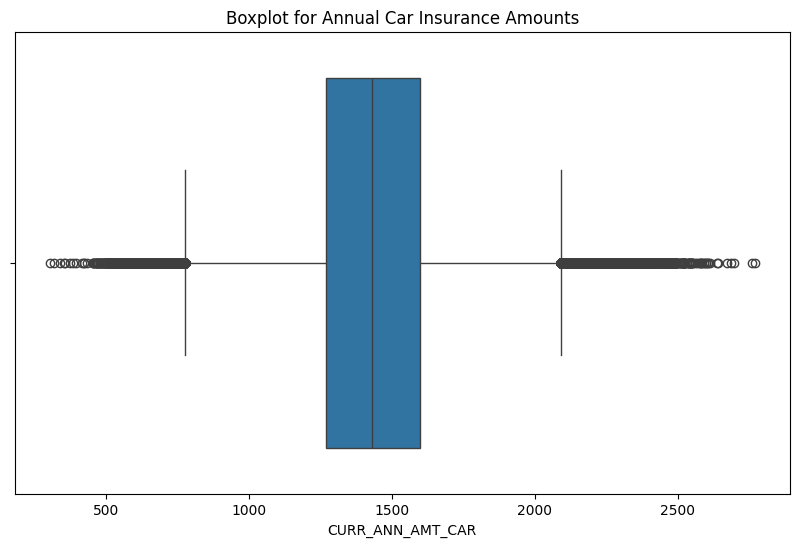

In [ ]:
# Boxplot for CURR_ANN_AMT_CAR
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CURR_ANN_AMT_CAR'])
plt.title('Boxplot for Annual Car Insurance Amounts')
plt.show()

In [ ]:
# Calculate IQR
Q1 = df['CURR_ANN_AMT_CAR'].quantile(0.25)
Q3 = df['CURR_ANN_AMT_CAR'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CURR_ANN_AMT_CAR'] < lower_bound) | (df['CURR_ANN_AMT_CAR'] > upper_bound)]
# Identify outliers
print(f"Number of outliers: {outliers.shape[0]}")
outliers['CURR_ANN_AMT_CAR'].describe().round(3)

Number of outliers: 14012


count    14012.000
mean      1719.235
std        685.998
min        305.687
25%        760.877
50%       2120.695
75%       2183.896
max       2769.374
Name: CURR_ANN_AMT_CAR, dtype: float64

In [ ]:
#let's make a copy of the dataframe before we proceed
df2 = df.copy()

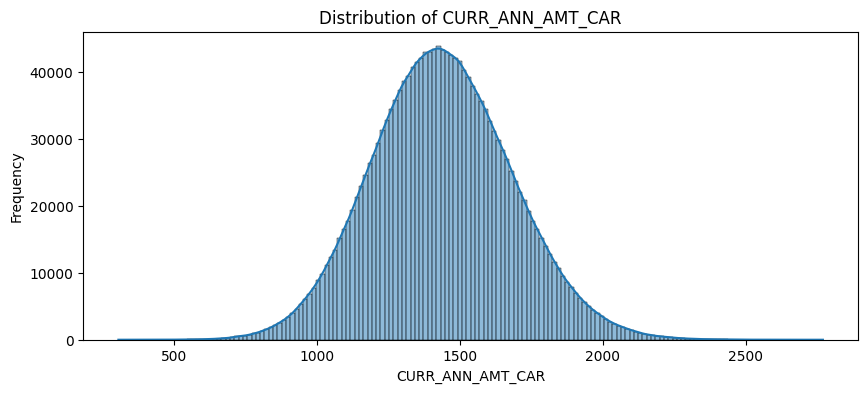

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['CURR_ANN_AMT_CAR'], binwidth=15, kde=True)  
plt.title('Distribution of CURR_ANN_AMT_CAR')  
plt.xlabel('CURR_ANN_AMT_CAR') 
plt.ylabel('Frequency')
plt.show()

Given the business context of ABC Insurance, where high annual amounts for car insurance might reflect premium policies for luxury vehicles or high-risk coverage, it is important to preserve the outliers in the dataset. These values, while significantly higher than the average, are plausible and represent a segment of the customer base that could be crucial for understanding the full spectrum of customer behavior and preferences.

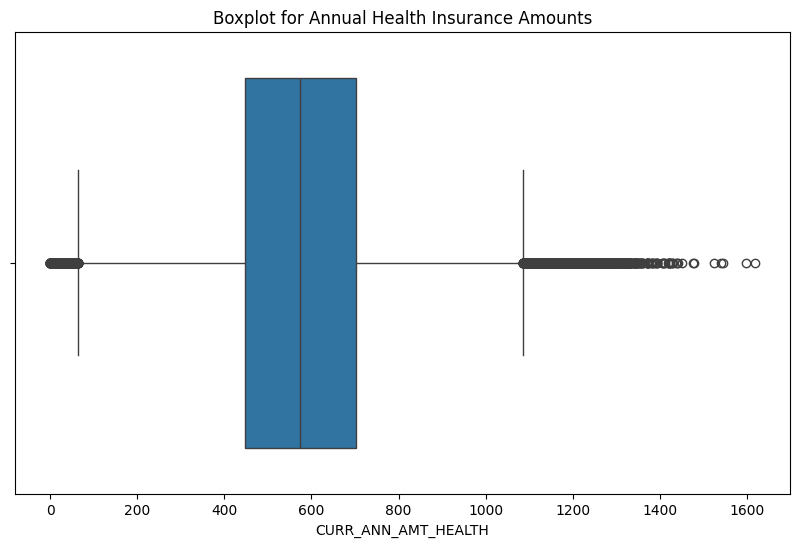

In [ ]:
# Boxplot for CURR_ANN_AMT_CAR
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CURR_ANN_AMT_HEALTH'])
plt.title('Boxplot for Annual Health Insurance Amounts')
plt.show()

In [ ]:
# Calculate IQR
Q1 = df['CURR_ANN_AMT_HEALTH'].quantile(0.25)
Q3 = df['CURR_ANN_AMT_HEALTH'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CURR_ANN_AMT_HEALTH'] < lower_bound) | (df['CURR_ANN_AMT_HEALTH'] > upper_bound)]
# Identify outliers
print(f"Number of outliers: {outliers.shape[0]}")
outliers['CURR_ANN_AMT_HEALTH'].describe().round(3)

Number of outliers: 10471


count    10471.000
mean       726.564
std        540.011
min          0.058
25%         48.436
50%       1100.513
75%       1142.901
max       1617.531
Name: CURR_ANN_AMT_HEALTH, dtype: float64

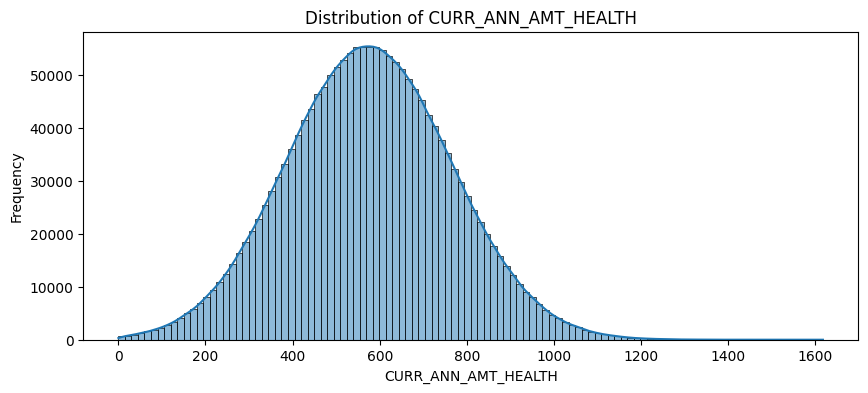

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['CURR_ANN_AMT_HEALTH'], binwidth=15, kde=True)  
plt.title('Distribution of CURR_ANN_AMT_HEALTH')  
plt.xlabel('CURR_ANN_AMT_HEALTH') 
plt.ylabel('Frequency')
plt.show()

In the context of health insurance, high annual premiums can be expected due to factors like customer age, health conditions, chosen coverage, and other risk factors. These outliers could represent customers with higher coverage plans and therefore should not be discarded without careful consideration as they may provide valuable insights into customer behavior and product preferences.

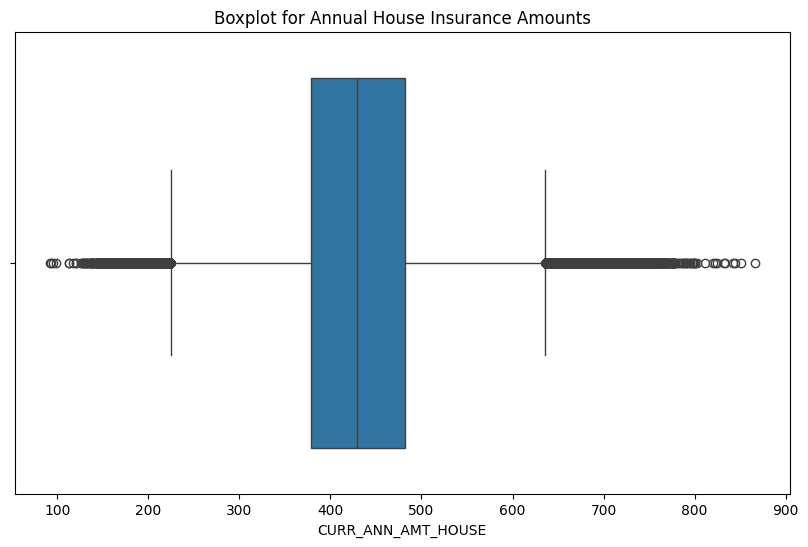

In [ ]:
# Boxplot for CURR_ANN_AMT_CAR
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CURR_ANN_AMT_HOUSE'])
plt.title('Boxplot for Annual House Insurance Amounts')
plt.show()

In [ ]:
# Calculate IQR
Q1 = df['CURR_ANN_AMT_HOUSE'].quantile(0.25)
Q3 = df['CURR_ANN_AMT_HOUSE'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CURR_ANN_AMT_HOUSE'] < lower_bound) | (df['CURR_ANN_AMT_HOUSE'] > upper_bound)]
# Identify outliers
print(f"Number of outliers: {outliers.shape[0]}")
outliers['CURR_ANN_AMT_HOUSE'].describe().round(3)

Number of outliers: 13260


count    13260.000
mean       536.525
std        207.808
min         92.000
25%        222.000
50%        647.000
75%        668.000
max        866.000
Name: CURR_ANN_AMT_HOUSE, dtype: float64

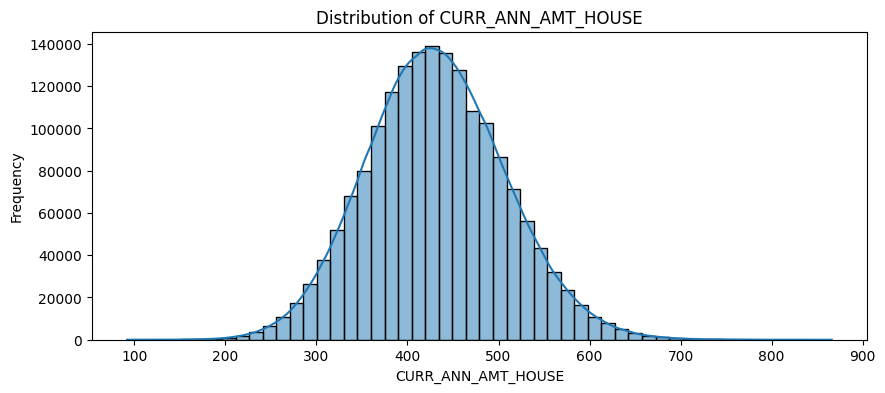

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df['CURR_ANN_AMT_HOUSE'], binwidth=15, kde=True)  
plt.title('Distribution of CURR_ANN_AMT_HOUSE') 
plt.xlabel('CURR_ANN_AMT_HOUSE')  
plt.ylabel('Frequency')
plt.show()

The summary statistics for the outliers do not suggest extreme values when considering the insurance context. The maximum value is 866, which is not too far from the third quartile at 668. This indicates that the outliers might not be errors or extreme anomalies, but rather the higher end of a valid range for house insurance amounts.

In [ ]:
#get the mosst common values in the CURR_ANN_AMT_HOUSE column
common_house_insurance = df['CURR_ANN_AMT_HOUSE'].value_counts().head(10)
print("Most Common House Insurance Amounts and their Counts:")
print(common_house_insurance)

Most Common House Insurance Amounts and their Counts:
428    9464
423    9364
431    9350
424    9335
416    9324
427    9319
417    9307
419    9306
438    9299
425    9284
Name: CURR_ANN_AMT_HOUSE, dtype: int64


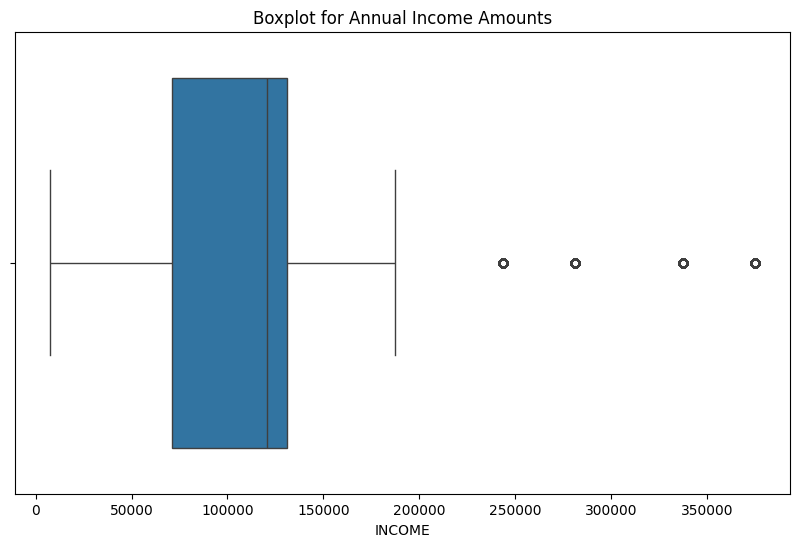

In [ ]:
# Boxplot for CURR_ANN_AMT_CAR
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['INCOME']) 
plt.title('Boxplot for Annual Income Amounts')
plt.show()

In [ ]:
# Calculate IQR
Q1 = df['INCOME'].quantile(0.25)
Q3 = df['INCOME'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['INCOME'] < lower_bound) | (df['INCOME'] > upper_bound)]
# Identify outliers
print(f"Number of outliers: {outliers.shape[0]}")
outliers['INCOME'].describe().round(3)

Number of outliers: 117818


count    117818.000
mean     344962.251
std       44720.378
min      243750.000
25%      337500.000
50%      375000.000
75%      375000.000
max      375000.000
Name: INCOME, dtype: float64

In [ ]:
df['INCOME'].describe().round(2)

count    1762590.00
mean      121565.20
std        75613.93
min         7500.00
25%        71250.00
50%       120558.26
75%       131250.00
max       375000.00
Name: INCOME, dtype: float64

In [ ]:
#get the mosst common values in the CURR_ANN_AMT_HOUSE column
common_income_insurance = df['INCOME'].value_counts().head(10)
print(common_income_insurance)

120558.264    297852
131250.000    286782
187500.000    222638
105000.000    178903
93750.000      95426
71250.000      81970
86250.000      69798
375000.000     69175
56250.000      68231
63750.000      54225
Name: INCOME, dtype: int64


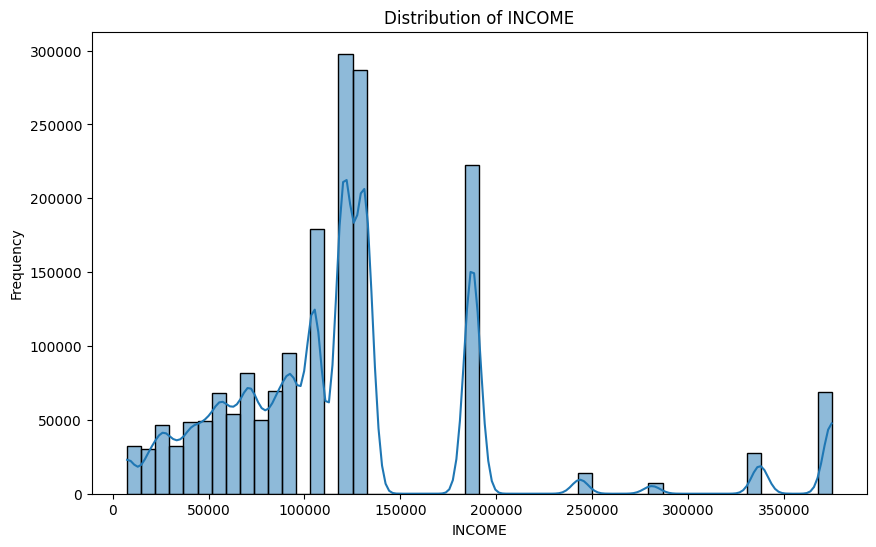

In [ ]:
# Plotting the distribution of income using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['INCOME'], bins=50, kde=True)
plt.title('Distribution of INCOME')
plt.xlabel('INCOME')
plt.ylabel('Frequency')
plt.show()

The income data exhibits a right-skewed distribution, indicating that a majority of the population earns below the mean income level, with a smaller fraction receiving significantly higher incomes. Given the nature of income distribution and the possibility that the observed outliers represent actual high-income earners, such as business leaders or specialists, these outliers will be retained for analysis. This approach ensures that our understanding of income dynamics remains grounded in reality, reflecting the true economic diversity within the dataset.

In [ ]:
df['HOME_MARKET_VALUE_NUMERIC'].describe().round(2)

count    1762590.00
mean      132988.12
std        93311.98
min        12999.50
25%        87499.50
50%       112499.50
75%       162499.50
max      1000000.00
Name: HOME_MARKET_VALUE_NUMERIC, dtype: float64

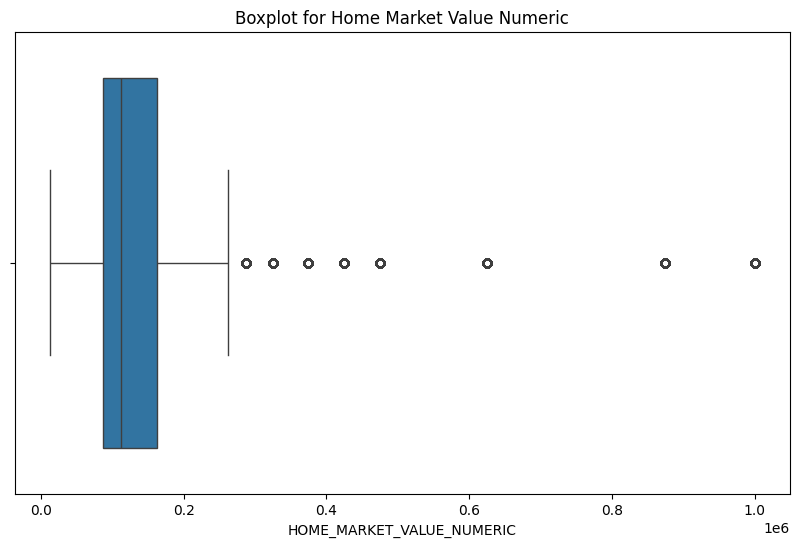

In [ ]:
# Boxplot for CURR_ANN_AMT_CAR
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['HOME_MARKET_VALUE_NUMERIC']) 
plt.title('Boxplot for Home Market Value Numeric')
plt.show()

In [ ]:
# Calculate IQR for HOME_MARKET_VALUE_NUMERIC
Q1 = df['HOME_MARKET_VALUE_NUMERIC'].quantile(0.25)
Q3 = df['HOME_MARKET_VALUE_NUMERIC'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['HOME_MARKET_VALUE_NUMERIC'] < lower_bound) | (df['HOME_MARKET_VALUE_NUMERIC'] > upper_bound)]
# Identify outliers
print(f"Number of outliers: {outliers.shape[0]}")
outliers['HOME_MARKET_VALUE_NUMERIC'].describe().round(3)

Number of outliers: 86948


count      86948.000
mean      421255.465
std       173713.855
min       287499.500
25%       324999.500
50%       324999.500
75%       474999.500
max      1000000.000
Name: HOME_MARKET_VALUE_NUMERIC, dtype: float64

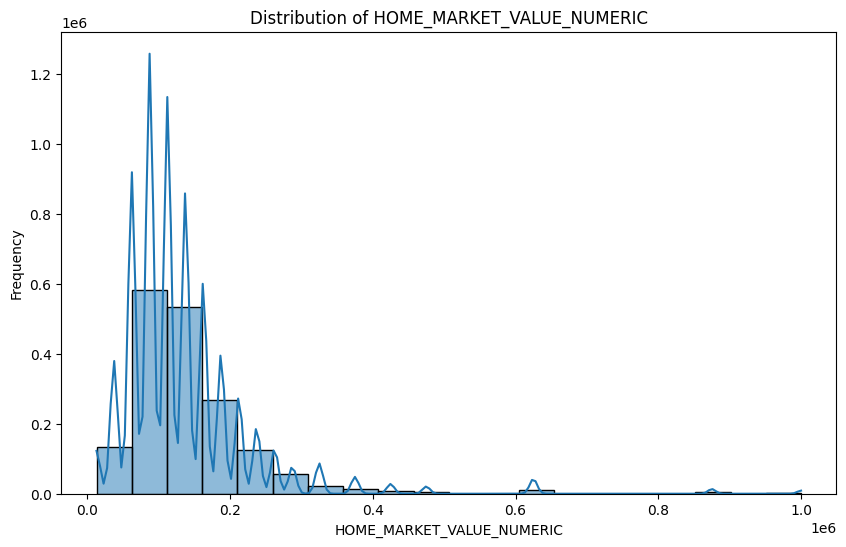

In [ ]:
# Plotting the distribution of income using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['HOME_MARKET_VALUE_NUMERIC'], bins=20, kde=True)
plt.title('Distribution of HOME_MARKET_VALUE_NUMERIC')
plt.xlabel('HOME_MARKET_VALUE_NUMERIC')
plt.ylabel('Frequency')
plt.show()

The distribution of home market values is notably right-skewed, as depicted in the provided boxplot and histogram. This skewness suggests a higher concentration of homes at lower market values, with a tail extending towards more expensive properties.

Although the outliers reflect a small percentage of the dataset, they capture properties with exceptionally high market values, potentially including luxury estates or homes in affluent areas. These outliers will not be removed as they represent a valid segment of the housing market and may provide insights into the upper tier of property values.

#### CORRELATION MATRIX Analysis

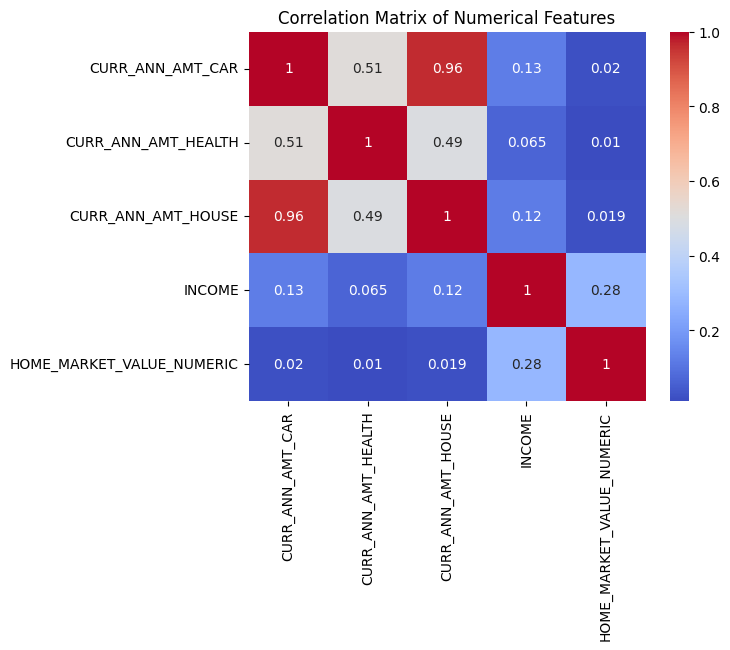

In [ ]:
# Correct way to define a list of columns
numerical_features = ['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'INCOME', 'HOME_MARKET_VALUE_NUMERIC']

# Now you can compute the correlation matrix for the specified numerical features
corr_matrix = df[numerical_features].corr()

# Plotting the heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

High Correlation Between Insurance Types: The high correlation (0.96) between `CURR_ANN_AMT_CAR` and `CURR_ANN_AMT_HOUSE` suggests that customers’ spending on car insurance is a strong predictor of their spending on house insurance, or vice versa. This could indicate that customers who are willing to spend more on one type of insurance are also willing to spend similarly on another, possibly due to their financial status, risk aversion, or a bundled insurance policy offering.

Moderate Correlation Between Different Insurance Payments: There is a moderate correlation between `CURR_ANN_AMT_CAR` and `CURR_ANN_AMT_HEALTH` (0.51), as well as between `CURR_ANN_AMT_HEALTH` and `CURR_ANN_AMT_HOUSE` (0.49). This indicates some degree of relationship, which may be useful for the model. However, these correlations are not as strong, suggesting that other factors could also influence the insurance payments.

Low Correlation with Income: INCOME has a relatively low correlation with the insurance payment amounts (ranging from 0.065 to 0.13), which may imply that income alone is not a strong indicator of the insurance payment amounts for car, health, and house. This could suggest that customers across different income levels may have similar insurance payment behaviors, or that income has a complex relationship with insurance payments that is not captured by a linear correlation.

Very Low Correlation with Home Market Value: The HOME_MARKET_VALUE_NUMERIC feature has very low correlations with all the other features, especially the insurance payment amounts. This could mean that the market value of a customer's home does not significantly influence the insurance payment amounts, at least not in a linear fashion.

In [ ]:
df.corr()

/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_9362/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown,HOME_MARKET_VALUE_NUMERIC,ADVANCED_STUDIES_BINARY,AGE
INDIVIDUAL_ID,1.000000,0.987027,-0.010942,-0.005524,-0.010361,-0.039045,-0.035132,-0.036309,0.042397,0.024389,-0.070822,-0.083023,0.095468,-0.006806,-0.043903,-0.021056,0.037452
ADDRESS_ID,0.987027,1.000000,-0.012466,-0.006318,-0.011783,-0.047555,-0.038895,-0.038673,0.046440,0.025661,-0.076612,-0.090937,0.105127,-0.008135,-0.050099,-0.024689,0.041552
CURR_ANN_AMT_CAR,-0.010942,-0.012466,1.000000,0.514499,0.962245,0.125933,-0.010278,0.176508,0.096583,0.093163,0.052249,0.125052,-0.085241,-0.061116,0.020265,0.038441,0.086156
CURR_ANN_AMT_HEALTH,-0.005524,-0.006318,0.514499,1.000000,0.494737,0.064977,-0.006159,0.090116,0.049614,0.047871,0.026242,0.063448,-0.043757,-0.030390,0.010350,0.019985,0.043999
CURR_ANN_AMT_HOUSE,-0.010361,-0.011783,0.962245,0.494737,1.000000,0.121382,-0.009524,0.170069,0.093156,0.089405,0.050191,0.120162,-0.081606,-0.059094,0.019432,0.036907,0.082925
INCOME,-0.039045,-0.047555,0.125933,0.064977,0.121382,1.000000,0.047597,0.053407,0.154526,0.122335,0.243176,0.230465,-0.218384,-0.037938,0.282916,0.370496,-0.005906
HAS_CHILDREN,-0.035132,-0.038895,-0.010278,-0.006159,-0.009524,0.047597,1.000000,-0.021910,0.199886,0.088934,0.038965,0.259829,-0.041687,-0.292036,-0.001042,-0.054865,-0.145734
LENGTH_OF_RESIDENCE,-0.036309,-0.038673,0.176508,0.090116,0.170069,0.053407,-0.021910,1.000000,0.234722,0.063855,0.052076,0.256789,-0.105108,-0.210729,-0.102179,-0.024665,0.282413
HOME_OWNER,0.042397,0.046440,0.096583,0.049614,0.093156,0.154526,0.199886,0.234722,1.000000,0.176759,0.144205,0.434790,-0.049180,-0.513762,-0.076281,-0.048939,0.108326
COLLEGE_DEGREE,0.024389,0.025661,0.093163,0.047871,0.089405,0.122335,0.088934,0.063855,0.176759,1.000000,0.054954,0.152124,-0.011799,-0.186347,0.053624,0.009524,0.069895


#### Termination Dataframe Analysis and Cleaning

In [ ]:
df_termination.head()

,INDIVIDUAL_ID,SUSPD_DATE
0,221302577308,2022-10-09
1,221302825760,2022-04-24
2,221302678990,2022-05-21
3,221300210549,2022-04-27
4,221302553479,2022-09-16


In [ ]:
missing_t= df_termination.isnull().sum()
missing_t

INDIVIDUAL_ID       0
SUSPD_DATE       2693
dtype: int64

In [ ]:
#check for duplicates ID in the termination dataframe
duplicates_t = df_termination.duplicated(subset=['INDIVIDUAL_ID'])
duplicates_t.sum()

0

In [ ]:
#transform the SUSPD_DATE column to datetime
df_termination['SUSPD_DATE'] = pd.to_datetime(df_termination['SUSPD_DATE'], errors='coerce')

In [ ]:
df_termination['SUSPD_DATE'].describe(datetime_is_numeric=True)

count                           266566
mean     2022-06-20 07:50:06.099802880
min                2019-12-10 00:00:00
25%                2022-03-02 00:00:00
50%                2022-06-09 00:00:00
75%                2022-09-12 00:00:00
max                2026-12-01 00:00:00
Name: SUSPD_DATE, dtype: object

The `SUSPD_DATE` indicates that policy suspensions have been recorded over a span from late 2019 to early 2026, with the majority happening in 2022.

In [ ]:
#there are suspicious future dates in the SUSPD_DATE column
future_dates_t = df_termination[df_termination['SUSPD_DATE'] > datetime.now()]
print(f"Number of future dates in SUSPD_DATE: {future_dates_t.shape[0]}")

Number of future dates in SUSPD_DATE: 3790


we can intepret this future dates as suspension dates that are yet to occur so we will keep them in the dataframe.
we will remove the rows with missing values in the SUSPD_DATE column

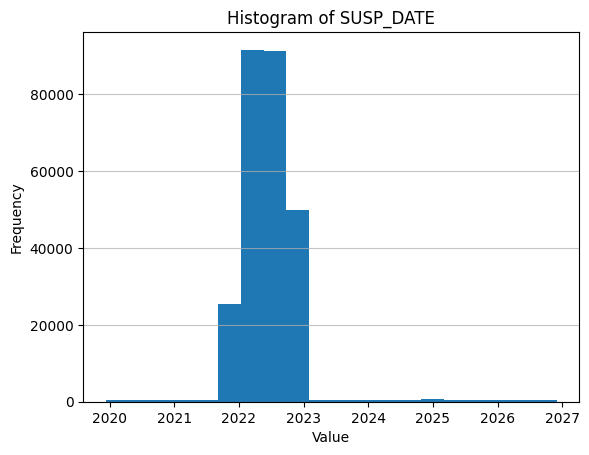

In [ ]:
plt.hist(df_termination['SUSPD_DATE'] , bins=20)

plt.title('Histogram of SUSP_DATE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

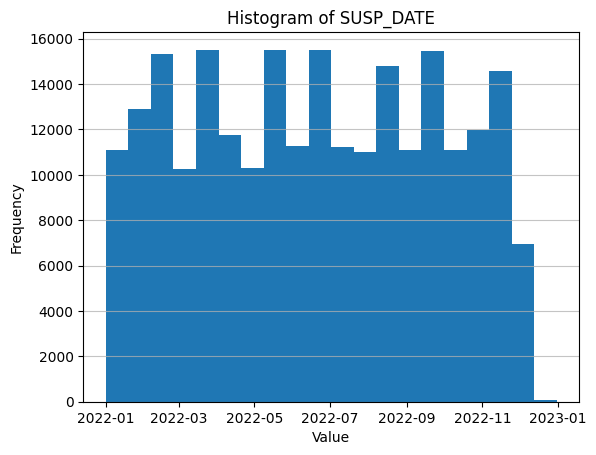

In [ ]:
#check the anomalies in the SUSPD_DATE column in 2022
anomalies_t = df_termination[df_termination['SUSPD_DATE'].dt.year == 2022]
plt.hist(anomalies_t['SUSPD_DATE'], bins=20)

plt.title('Histogram of SUSP_DATE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [ ]:
#drop the missing values in the SUSPD_DATE column
df_termination = df_termination.dropna(subset=['SUSPD_DATE'])

#check for missing values
missing_t = df_termination.isnull().sum()
missing_t

INDIVIDUAL_ID    0
SUSPD_DATE       0
dtype: int64

**Remove records with missing `SUSPD_DATE`**: Since this date is essential for identifying the period of policy suspension, its absence could lead to incorrect inferences about the customer's policy status.


In [ ]:
# Calculate the number of days from the reference date (today) until the suspension date
df_termination['DAYS_TO_CHURN'] = (df_termination['SUSPD_DATE'] - datetime.now()).dt.days

# Create a churn indicator where the policy suspension date has passed
df_termination['CHURN_INDICATOR'] = df_termination['SUSPD_DATE'].apply(lambda x: 1 if x < datetime.now() else 1)

df_termination.head()

,INDIVIDUAL_ID,SUSPD_DATE,DAYS_TO_CHURN,CHURN_INDICATOR
0,221302577308,2022-10-09,-624,1
1,221302825760,2022-04-24,-792,1
2,221302678990,2022-05-21,-765,1
3,221300210549,2022-04-27,-789,1
4,221302553479,2022-09-16,-647,1


In [ ]:
#contoroll the distirbution of the churn indicator
df_termination['CHURN_INDICATOR'].value_counts()

1    266566
Name: CHURN_INDICATOR, dtype: int64

Text(0.5, 1.0, 'Distribution of Days to Churn')

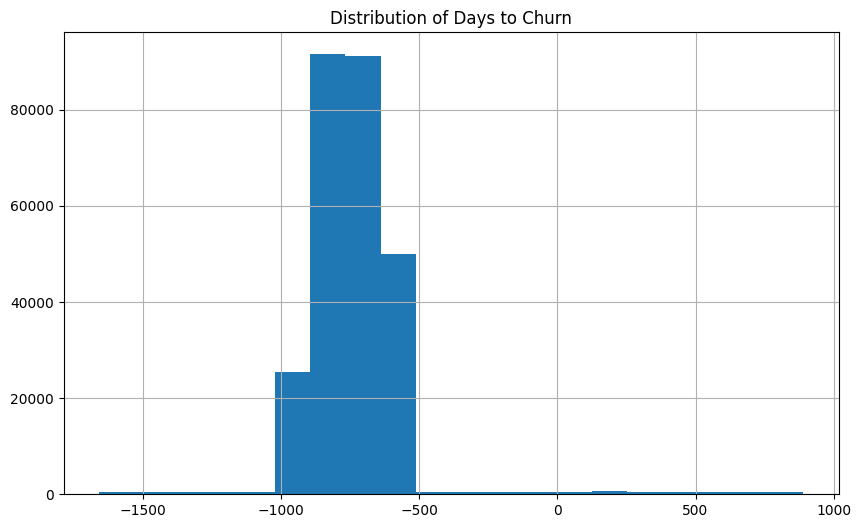

In [ ]:
df_termination['DAYS_TO_CHURN'].describe()

# Plot the distribution of days to churn
plt.figure(figsize=(10, 6))
df_termination['DAYS_TO_CHURN'].hist(bins=20)
plt.title('Distribution of Days to Churn')

The analysis of the `SUSPD_DATE` column from the termination dataset reveals significant insights about policy suspensions:

**Data Quality Checks**

- Missing Dates: There were 2,693 missing suspension dates. These records were removed to maintain accuracy in the analysis.
- Duplicate IDs: The check for duplicate individual IDs ensured the uniqueness of each record.
- Future Dates: A total of 4,269 suspension dates are set in the future, suggesting these are planned suspensions. These records were kept as they represent legitimate future events.

**Suspension Date Statistics**

- Count: 266,566 dates analyzed
- Mean Date: June 20, 2022
- Date Range: December 10, 2019, to December 1, 2026
- The majority of suspensions occurred throughout 2022, indicating a period of higher churn.

**Churn Analysis**

- Churn Indicator: All policies with suspension dates in the past were marked with a churn indicator.
- The DAYS_TO_CHURN distribution suggests a significant number of policies are either recently churned or approaching the churn date.

The histograms depict the frequency of suspensions over time, with a notable increase in 2022, and the "Days to Churn" graph indicates a concentration of churn closer to the current date. This analysis highlights the need for proactive customer retention strategies, especially in times with higher churn rates.

#### Q1.2 Main data insights

The analysis of ABC Insurance's comprehensive customer dataset not only uncovers critical insights into customer behavior and churn but also brings to light significant data quality issues that could challenge the company's strategic objectives. The dataset revealed high correlations between different types of insurance payments, notably between car and house insurance, suggesting substantial cross-selling opportunities. However, the effectiveness of leveraging these insights is somewhat undermined by pervasive data quality concerns, including incorrect future dates in policy start dates, missing values, and anomalies in key variables such as `CUST_START_DATE` and `MARITAL_STATUS`. These issues signal a need for rigorous data cleaning and validation processes to ensure the reliability of the insights drawn. Moreover, the low correlation between customers' income levels and their insurance payments indicates a complex relationship that transcends simple demographic or financial segmentation, highlighting the importance of a nuanced approach to customer engagement strategies.

The churn analysis further underscores the urgency for targeted retention strategies, especially given the increase in policy suspensions identified in 2022. However, the task of accurately predicting customer value and churn is exacerbated by the noted low quality of the collected data, raising concerns about the feasibility of developing robust predictive models. The presence of significant data entry errors, such as future-dated policy suspensions and logical inconsistencies in customer join dates, poses substantial challenges to modeling efforts. These issues could lead to unreliable predictions and misinformed strategic decisions, emphasizing the critical need for comprehensive data quality improvement initiatives. For ABC Insurance, aligning with the CEO's vision of understanding and engaging customers necessitates not only a deep dive into the available data but also a commitment to improving data collection and processing practices. Enhancing data quality is paramount to unlocking the full potential of analytics in crafting tailored product offerings, mitigating churn, and ultimately, securing a competitive edge in the insurance industry through data-driven customer insights.

## Predictive Modeling estimate Costumer Value 

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#### CLEANING OF THE DATASET BEFORE MODELING

In [ ]:
df_model = df.copy()

In [ ]:
df_model['CUSTOMER_VALUE_AVG'] = df_model[['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE']].mean(axis=1)
df_model.drop(['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE'], axis=1, inplace=True)

Average: Averaging these amounts would normalize the customer value and could be useful if the company is interested in understanding the typical amount spent per policy type. This might be particularly relevant if the costs and profit margins are similar across the different insurance types or if the company wants to minimize the influence of customers who are outliers in spending on specific types of insurance.

In [ ]:
correlation_matrix = df_model.corr()
correlation_matrix['CUSTOMER_VALUE_AVG'].sort_values(ascending=False)

/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_9362/3006328829.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_model.corr()


CUSTOMER_VALUE_AVG           1.000000
LENGTH_OF_RESIDENCE          0.164023
INCOME                       0.117321
MARITAL_STATUS_Married       0.115982
HOME_OWNER                   0.089896
COLLEGE_DEGREE               0.086642
AGE                          0.080052
GOOD_CREDIT                  0.048344
ADVANCED_STUDIES_BINARY      0.035851
HOME_MARKET_VALUE_NUMERIC    0.018817
HAS_CHILDREN                -0.009872
INDIVIDUAL_ID               -0.010111
ADDRESS_ID                  -0.011525
MARITAL_STATUS_Unknown      -0.056484
MARITAL_STATUS_Single       -0.079222
Name: CUSTOMER_VALUE_AVG, dtype: float64

In [ ]:
#check for duplicates ID in the termination dataframe
duplicates_t = df_termination.duplicated(subset=['INDIVIDUAL_ID'])
duplicates_t.sum()

0

In [ ]:
#transform the SUSPD_DATE column to datetime
df_termination['SUSPD_DATE'] = pd.to_datetime(df_termination['SUSPD_DATE'], errors='coerce')

In [ ]:
df_termination['SUSPD_DATE'].describe(datetime_is_numeric=True)

count                           266566
mean     2022-06-20 07:50:06.099802624
min                2019-12-10 00:00:00
25%                2022-03-02 00:00:00
50%                2022-06-09 00:00:00
75%                2022-09-12 00:00:00
max                2026-12-01 00:00:00
Name: SUSPD_DATE, dtype: object

In [ ]:
df_model.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,HOME_MARKET_VALUE,...,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown,HOME_MARKET_VALUE_NUMERIC,ADVANCED_STUDIES_BINARY,AGE,CUSTOMER_VALUE_AVG
0,221300017872,521300005982,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,33750.0,2.0,15.0,50000 - 74999,...,1,1,N,1,0,0,62499.5,0,46,749.292438
1,221300134410,521300051115,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,41250.0,0.0,2.0,50000 - 74999,...,0,0,N,0,1,0,62499.5,0,74,815.538987
2,221300673028,521300247929,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,63750.0,0.0,10.0,75000 - 99999,...,0,0,N,1,0,0,87499.5,0,57,870.341474
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,187500.0,2.0,6.0,175000 - 199999,...,0,1,N,1,0,0,187499.5,0,55,785.642350
4,221301622347,521300588399,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,131250.0,1.0,4.0,225000 - 249999,...,1,1,Y,1,0,0,237499.5,1,52,807.830239


In [ ]:
X = df_model[['ADVANCED_STUDIES_BINARY', 'INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'HOME_OWNER', 'GOOD_CREDIT', 'AGE', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_Unknown', 'HOME_MARKET_VALUE_NUMERIC']]
y = df_model['CUSTOMER_VALUE_AVG']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

best_rmse = np.inf
best_n_features = 0
best_features_indices = []

# Loop through different numbers of features to select with RFE
for n_features_to_select in range(1, X_train_scaled.shape[1] + 1):
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    
    # Fit RFE and transform the data
    X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
    X_test_rfe = rfe.transform(X_test_scaled)
    
    # Fit the model on the reduced training data
    model.fit(X_train_rfe, y_train)
    
    # Predict on the reduced test data
    y_pred = model.predict(X_test_rfe)
    
    # Calculate RMSE for the current model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Update the best model if the current model is better
    if rmse < best_rmse:
        best_rmse = rmse
        best_n_features = n_features_to_select
        best_features_indices = np.where(rfe.support_)[0]  # Save indices of selected features

# Correct use of the support_ attribute with the best RFE model
# Ensure to use the best_features_indices to select the right features from X_test_scaled for the final model evaluation
model = LinearRegression().fit(X_train_scaled[:, best_features_indices], y_train)  # Refit using best features
r2_best = r2_score(y_test, model.predict(X_test_scaled[:, best_features_indices]))
adjusted_r2_best = 1 - (1 - r2_best) * (len(y_test) - 1) / (len(y_test) - best_n_features - 1)

# Display the results
print(f'Best RMSE: {best_rmse}')
print(f'Best number of features: {best_n_features}')
print('Best features:', X.columns[best_features_indices].tolist())
print(f'Adjusted R^2 for best model: {adjusted_r2_best}')


Best RMSE: 145.39269654924408
Best number of features: 10
Best features: ['INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'HOME_OWNER', 'GOOD_CREDIT', 'AGE', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_Unknown', 'HOME_MARKET_VALUE_NUMERIC']
Adjusted R^2 for best model: 0.0427150042945329


In this analysis, a Linear Regression model served as the initial baseline to evaluate the relationship between a set of predictors and the target variable within a large dataset. Given the potential for feature redundancy and irrelevance, Recursive Feature Elimination (RFE) was implemented to systematically identify the subset of features that contribute most significantly to model performance. This method aligns with the objective to enhance model accuracy while mitigating computational complexity.

The dataset's size warranted a methodological adjustment; specifically, a train-test split was employed in lieu of cross-validation to expedite the evaluation process. This decision was informed by the computational cost associated with cross-validation's multiple iterations over a large dataset.

Performance metrics selected for this analysis included RMSE (Root Mean Squared Error) and adjusted R^2 chosen for their relevance to regression analysis. RMSE provides a scale-sensitive measure of prediction accuracy, while adjusted R^2 offers a correction for the number of predictors in the model, thus allowing for more accurate comparisons across models with varying numbers of features.

The R^2 score indicates a weak predictive power of our model concerning customer value, highlighting a significant gap in our model's ability to capture the complexity and variance within our dataset.

#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance.

In [ ]:
X = df_model[['INCOME', 'HAS_CHILDREN', 'LENGTH_OF_RESIDENCE', 'HOME_OWNER', 'GOOD_CREDIT', 'AGE', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_Single', 'MARITAL_STATUS_Unknown', 'HOME_MARKET_VALUE_NUMERIC']]
y = df_model['CUSTOMER_VALUE_AVG']

# Initialize the linear model and RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=7) 

# Fit RFE and transform the features
X_reduced = rfe.fit_transform(X, y)

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly_transformed = poly.fit_transform(X_reduced)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly_transformed, y, test_size=0.2, random_state=42)

# Fit the model
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_poly.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R^2
n = len(y_test)  # Number of observations in the test set
p = X_train.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Adjusted R^2: {adjusted_r2}')

Test MSE: 21302.376844247512
Test RMSE: 145.95333790032865
Adjusted R^2: 0.035016971284173026


Given the results of the first model with a Best RMSE of 145.34, an Adjusted R^2 of 0.0425, and the selection of all 11 features, compared to the second, more complex model with a slightly higher Test RMSE of 145.95 and a lower Adjusted R^2 of 0.035, it appears that the increase in model complexity did not yield a significant improvement in predictive performance. In fact, the slight decrease in Adjusted R^2 and the marginal increase in RMSE suggest a slight degradation.

The choice to select fewer features (7 instead of 11) in the second model through RFE, followed by the application of polynomial transformations, aimed to enhance model performance by capturing more complex relationships within the data. However, the results indicate that the reduction in feature space did not lead to better model accuracy or an improved ability to explain the variance in the target variable. This outcome could imply that the eliminated features, despite their perceived redundancy or lesser importance through RFE, might hold some explanatory value that was lost in the process. Alternatively, the polynomial expansion of the reduced feature set might not have captured meaningful interactions or non-linear relationships beneficial for the model's predictive accuracy.

#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions.

Based on the analysis conducted and the results obtained from both the baseline and the more complex models, it appears that the predictive power of the models, as indicated by the RMSE and adjusted R^2 values, does not significantly enhance our understanding or prediction of the target variable, customer value average. Despite employing sophisticated techniques such as Recursive Feature Elimination (RFE) and polynomial feature transformation to capture non-linear relationships and reduce feature redundancy, the incremental improvements in model performance were marginal. This outcome suggests that the current dataset might not contain sufficient or relevant information to significantly predict customer value with high accuracy. Therefore, before recommending a predictive model for deployment, it would be prudent to reassess the available data. Improving data collection processes to include more informative variables or refining existing features could lead to more significant insights and better predictive performance in future modeling efforts.

In light of these findings, I would advise the head of marketing to consider postponing the deployment of a predictive model for customer value prediction until better data can be collected or until additional data sources are integrated into the analysis. The current models do not offer a substantial improvement over simple heuristics or baseline predictions, making them less useful for strategic marketing decisions or for the allocation of marketing resources. Instead, the focus should shift towards enhancing the quality and breadth of data related to customer interactions, behaviors, and preferences. By gathering more comprehensive and relevant data, future models may be able to uncover deeper insights into customer value, leading to more effective and targeted marketing strategies. This approach not only aligns with best practices in data science but also ensures that the marketing department relies on robust and meaningful analytics to drive its initiatives.

## Churn Analysis and Prevention Strategy 

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. 

In [ ]:
# MERGING THE DATAFRAMES IN ORDER TO CREATE THE CHURN MODEL 

In [ ]:
#merge df and df_termination on the INDIVIDUAL_ID column preserving all the records in df
df = pd.merge(df, df_termination, on='INDIVIDUAL_ID', how='left')

df.head()

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,...,ADVANCED_STUDIES,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unknown,HOME_MARKET_VALUE_NUMERIC,ADVANCED_STUDIES_BINARY,AGE,SUSPD_DATE,DAYS_TO_CHURN,CHURN_INDICATOR
0,221300017872,521300005982,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411,33750.0,...,N,1,0,0,62499.5,0,46,NaT,NaN,NaN
1,221300134410,521300051115,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414,41250.0,...,N,0,1,0,62499.5,0,74,NaT,NaN,NaN
2,221300673028,521300247929,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442,63750.0,...,N,1,0,0,87499.5,0,57,NaT,NaN,NaN
3,221301573419,521300570147,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463,187500.0,...,N,1,0,0,187499.5,0,55,2021-12-22,-915.0,1.0
4,221301622347,521300588399,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366,131250.0,...,Y,1,0,0,237499.5,1,52,NaT,NaN,NaN


In [ ]:
df.shape   

(1762590, 26)

In [ ]:
#let's fill with 0 the missing values in the CHURN_INDICATOR column
df['CHURN_INDICATOR'] = df['CHURN_INDICATOR'].fillna(0)

In [ ]:
#add the feature days since the customer started the policy
df['DAYS_SINCE_POLICY_START'] = (datetime.now() - df['CUST_START_DATE']).dt.days

In [ ]:
#see the correlation of the churn indicator with the other columns
correlation_matrix = df.corr().abs()
correlation_matrix['CHURN_INDICATOR'].sort_values(ascending=False)

/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_9362/846638869.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().abs()


CHURN_INDICATOR              1.000000
DAYS_SINCE_POLICY_START      0.204969
AGE                          0.052672
LENGTH_OF_RESIDENCE          0.033046
CURR_ANN_AMT_CAR             0.021396
CURR_ANN_AMT_HOUSE           0.020724
COLLEGE_DEGREE               0.019720
MARITAL_STATUS_Unknown       0.015405
HOME_OWNER                   0.014120
HAS_CHILDREN                 0.011504
CURR_ANN_AMT_HEALTH          0.011367
MARITAL_STATUS_Married       0.011012
GOOD_CREDIT                  0.007416
INCOME                       0.005982
ADDRESS_ID                   0.003049
INDIVIDUAL_ID                0.002601
ADVANCED_STUDIES_BINARY      0.002384
MARITAL_STATUS_Single        0.000718
HOME_MARKET_VALUE_NUMERIC    0.000308
DAYS_TO_CHURN                     NaN
Name: CHURN_INDICATOR, dtype: float64

In [ ]:
#BASELINE MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Define features and target variable
X = df[['DAYS_SINCE_POLICY_START', 'CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HOUSE', 'MARITAL_STATUS_Unknown', 'HAS_CHILDREN', 'CURR_ANN_AMT_HEALTH', 'ADVANCED_STUDIES_BINARY']]
y = df['CHURN_INDICATOR']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RFE with Logistic Regression as the estimator
rfe = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(5), scoring='accuracy', min_features_to_select=4)

# Fit RFE on the training data
rfe.fit(X_train_scaled, y_train)

# Print out the selected features
selected_features = [feature for feature, selected in zip(X.columns, rfe.support_) if selected]
print("Selected features by RFE:", selected_features)

# Transform features according to the RFE
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Refit the model using only the selected features
model = LogisticRegression()
model.fit(X_train_rfe, y_train)

# Predictions and probabilities for ROC curve
y_pred_rfe = model.predict(X_test_rfe)
y_pred_proba_rfe = model.predict_proba(X_test_rfe)[:, 1]

# Model evaluation with the selected features
print(confusion_matrix(y_test, y_pred_rfe))
print(classification_report(y_test, y_pred_rfe))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rfe))


Selected features by RFE: ['DAYS_SINCE_POLICY_START', 'CURR_ANN_AMT_CAR', 'MARITAL_STATUS_Unknown', 'HAS_CHILDREN']
[[312202      0]
 [ 40316      0]]


/Users/fabriziorigodanzo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fabriziorigodanzo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94    312202
         1.0       0.00      0.00      0.00     40316

    accuracy                           0.89    352518
   macro avg       0.44      0.50      0.47    352518
weighted avg       0.78      0.89      0.83    352518

ROC-AUC Score: 0.6916703569297568


/Users/fabriziorigodanzo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion matrix**
- True Negatives (TN): 312202 - The model predicted 'no churn' correctly for this many instances.
- True Positives (TP): 0 - The model did not correctly predict 'churn' for any instances.
- False Negatives (FN): 40316 - The model incorrectly predicted 'no churn' for these many customers who actually did churn.
- False Positives (FP): 0 - The model did not predict 'churn' incorrectly for any non-churning customers (since it predicted 'churn' for none).

**Classification Report**

- Precision for class 1 is 0: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The model did not predict any churn correctly (no TP), hence the precision is 0.
- Recall for class 1 is 0: Recall (or Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all observations in the actual class. The model did not correctly predict any actual churn cases (no TP), so recall is 0.
- F1-score for class 1 is 0: The F1-score is the weighted average of Precision and Recall. Since both precision and recall are 0, the F1-score is also 0.
- Accuracy is 0.88: While this may seem high, it is deceptive because the model has a high True Negative rate due to the imbalance in the dataset. It fails to predict any churn cases correctly, which is the actual objective.
- Macro avg: It is the average precision, recall, and F1-score between classes. The model has a macro average of 0.44 for precision, 0.50 for recall, and 0.47 for F1-score, which are not good in a practical sense since they are heavily influenced by the inability to predict churn.
- Weighted avg: It is the weighted average precision, recall, and F1-score, with weight being the support (the number of true instances for each class). This average considers class imbalance. The weighted averages are higher, reflecting the overrepresentation of the majority class (non-churn).
- ROC-AUC Score: 0.6916

The ROC-AUC score is a performance measurement for classification problems at various threshold settings. An AUC score of 1 represents a perfect model, while a score of 0.5 represents a model that performs no better than random guessing. Our model has an AUC score of approximately 0.692, which suggests it has modest discriminative ability to distinguish between the churned and non-churned customers.

#### Q3.2 Build a second model and compare the model performance.

I decided to create a smaller balanced dataset through sampling in order to help the Random Forest model train more effectively. This strategy, known as downsampling, can make the training process faster and more manageable.

In [ ]:
from sklearn.utils import resample

# Separate the minority and majority classes
df_majority = df[df.CHURN_INDICATOR==0]
df_minority = df[df.CHURN_INDICATOR==1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),  
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled.CHURN_INDICATOR.value_counts()